


<h1 align="center">Simplilearn Post Graduate Program - Data Science - In Partnership With Purdue University</h1>  

<div style="font-size: 22px">
<b> <center>R Project report - Retail Analysis with Walmart Data </center></b><br>
</div>

<div  style="font-size: 17px">
Organization: <b>Simplilearn - Purdue University</b><br>
Batch: <b>PGP DS Mar 2022 COHORT 2</b><br>
Course: <b>PG -DS - Data Science with R</b><br>
Project: <b>Retail Analysis with Walmart Data</b><br>
Programming Language: <b>R</b><br>
Submitted by: <b>Lavkush Singh</b>
</div>

## Dataset Description

**This is the historical data which covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. This file has the following fields:**

* **Store** - the store number
* **Date** - the week of sales
* **Weekly_Sales** -  sales for the given store
* **Holiday_Flag** - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
* **Temperature** - Temperature on the day of sale
* **Fuel_Price** - Cost of fuel in the region
* **CPI** – Prevailing consumer price index
* **Unemployment** - Prevailing unemployment rate



## Problem Statement

**Based on the given data, basic analysis to be performed, and to model a Linear Regression to forecast demand**

##### Basic Statistics tasks

- Which store has maximum sales
- Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation
- Which store/s has good quarterly growth rate in Q3’2012
- Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together
- Provide a monthly and semester view of sales in units and give insights

 

##### Statistical Model
- For Store 1 – Build  prediction models to forecast demand
    - Hypothesize if CPI, unemployment, and fuel price have any impact on sales.
    - Change dates into days by creating new variable.
    - Linear Regression

## A. Importing necessary libraries and setting up working environment

In [1]:
library('ggplot2')
library('dplyr')
library('lubridate')
library('caTools')
library('tidyr')
library('RColorBrewer')
library('modelr')
library('caret')

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'lubridate' was built under R version 3.6.3"
Attaching package: 'lubridate'

The following objects are masked from 'package:base':

    date, intersect, setdiff, union

Warning message:
"package 'caTools' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'modelr' was built under R version 3.6.3"Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice


In [2]:
getwd() # getting working directory

[1] "E:/R Workspace/R_Projects"

In [3]:
options("digits" = 15) # controls the number of digits to print when printing numeric values, currently set to 15

In [4]:
# This is a useful function, which controls the size of the plots created. 
# This function is called before creating almost every plot in this notebook.
# E.g. fig(6,4) --> This will set the width of the plot to 6 units and height as 4 units

fig <- function(width, heigth){
options(repr.plot.width = width, repr.plot.height = heigth)
}

### B. Loading data into R

In [5]:
walmart_data <- read.csv('Datasets/Walmart_Store_sales.csv', stringsAsFactors = FALSE) # reading the data in R

In [6]:
head(walmart_data) # checking first 6 observations of data

Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,05-02-2010,1643690.90,0,42.31,2.572,211.0963582,8.106
1,12-02-2010,1641957.44,1,38.51,2.548,211.2421698,8.106
1,19-02-2010,1611968.17,0,39.93,2.514,211.2891429,8.106
1,26-02-2010,1409727.59,0,46.63,2.561,211.3196429,8.106
1,05-03-2010,1554806.68,0,46.50,2.625,211.3501429,8.106
1,12-03-2010,1439541.59,0,57.79,2.667,211.3806429,8.106


In [7]:
dim(walmart_data) # checking the shape of the data, rows and column numbers

[1] 6435    8

### Checking if the data has duplicate values, if there were duplicates, the below would return different dimentions, since this is same as that of imported walmart_data, there are no duplicates

In [8]:
dim(unique(walmart_data))

[1] 6435    8

## C. Data Wrangling/Manipulation & Exploratory Data Analysis

In [9]:
str(walmart_data) # checking the structure of data

'data.frame':	6435 obs. of  8 variables:
 $ Store       : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Date        : chr  "05-02-2010" "12-02-2010" "19-02-2010" "26-02-2010" ...
 $ Weekly_Sales: num  1643691 1641957 1611968 1409728 1554807 ...
 $ Holiday_Flag: int  0 1 0 0 0 0 0 0 0 0 ...
 $ Temperature : num  42.3 38.5 39.9 46.6 46.5 ...
 $ Fuel_Price  : num  2.57 2.55 2.51 2.56 2.62 ...
 $ CPI         : num  211 211 211 211 211 ...
 $ Unemployment: num  8.11 8.11 8.11 8.11 8.11 ...


In [10]:
# Converting data object to appropriate type, using dmy() of lubridate library

walmart_data$Date <- dmy(walmart_data$Date)

In [11]:
head(walmart_data, n = 10)

Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,2010-02-05,1643690.90,0,42.31,2.572,211.0963582,8.106
1,2010-02-12,1641957.44,1,38.51,2.548,211.2421698,8.106
1,2010-02-19,1611968.17,0,39.93,2.514,211.2891429,8.106
1,2010-02-26,1409727.59,0,46.63,2.561,211.3196429,8.106
1,2010-03-05,1554806.68,0,46.50,2.625,211.3501429,8.106
1,2010-03-12,1439541.59,0,57.79,2.667,211.3806429,8.106
1,2010-03-19,1472515.79,0,54.58,2.720,211.2156350,8.106
1,2010-03-26,1404429.92,0,51.45,2.732,211.0180424,8.106
1,2010-04-02,1594968.28,0,62.27,2.719,210.8204499,7.808
1,2010-04-09,1545418.53,0,65.86,2.770,210.6228574,7.808


In [12]:
str(walmart_data)

'data.frame':	6435 obs. of  8 variables:
 $ Store       : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Date        : Date, format: "2010-02-05" "2010-02-12" ...
 $ Weekly_Sales: num  1643691 1641957 1611968 1409728 1554807 ...
 $ Holiday_Flag: int  0 1 0 0 0 0 0 0 0 0 ...
 $ Temperature : num  42.3 38.5 39.9 46.6 46.5 ...
 $ Fuel_Price  : num  2.57 2.55 2.51 2.56 2.62 ...
 $ CPI         : num  211 211 211 211 211 ...
 $ Unemployment: num  8.11 8.11 8.11 8.11 8.11 ...


In [13]:
summary(walmart_data) # checking the summary of the dataset

     Store         Date             Weekly_Sales          
 Min.   : 1   Min.   :2010-02-05   Min.   : 209986.25000  
 1st Qu.:12   1st Qu.:2010-10-08   1st Qu.: 553350.10500  
 Median :23   Median :2011-06-17   Median : 960746.04000  
 Mean   :23   Mean   :2011-06-17   Mean   :1046964.87756  
 3rd Qu.:34   3rd Qu.:2012-02-24   3rd Qu.:1420158.66000  
 Max.   :45   Max.   :2012-10-26   Max.   :3818686.45000  
  Holiday_Flag              Temperature               Fuel_Price           
 Min.   :0.0000000000000   Min.   : -2.0600000000   Min.   :2.47200000000  
 1st Qu.:0.0000000000000   1st Qu.: 47.4600000000   1st Qu.:2.93300000000  
 Median :0.0000000000000   Median : 62.6700000000   Median :3.44500000000  
 Mean   :0.0699300699301   Mean   : 60.6637824398   Mean   :3.35860683761  
 3rd Qu.:0.0000000000000   3rd Qu.: 74.9400000000   3rd Qu.:3.73500000000  
 Max.   :1.0000000000000   Max.   :100.1400000000   Max.   :4.46800000000  
      CPI                 Unemployment           
 Min.

In [14]:
any(is.na(walmart_data)) # checking if there are any missing value in the entire dataset

[1] FALSE

In [15]:
sapply(walmart_data, is.null) # checking column wise missing values

Store         Date Weekly_Sales Holiday_Flag  Temperature   Fuel_Price 
       FALSE        FALSE        FALSE        FALSE        FALSE        FALSE 
         CPI Unemployment 
       FALSE        FALSE

In [16]:
walmart_data %>% summarise_all(~ sum(is.na(.))) # Another way of getting missing value count per column

Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,0,0,0,0,0,0,0


In [17]:
unique(walmart_data$Store)  # viewing the number of unique stores 

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45

In [18]:
table(walmart_data$Holiday_Flag) # count of total holidays and non-holidays, there are 450 holidays in the dataset 


   0    1 
5985  450 

In [19]:
walmart_data$Weekly_Sales_Scaled = walmart_data$Weekly_Sales / 100000 # scaling sales to make it compareable to other columns

In [20]:
head(walmart_data, n=10)

Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales_Scaled
1,2010-02-05,1643690.90,0,42.31,2.572,211.0963582,8.106,16.4369090
1,2010-02-12,1641957.44,1,38.51,2.548,211.2421698,8.106,16.4195744
1,2010-02-19,1611968.17,0,39.93,2.514,211.2891429,8.106,16.1196817
1,2010-02-26,1409727.59,0,46.63,2.561,211.3196429,8.106,14.0972759
1,2010-03-05,1554806.68,0,46.50,2.625,211.3501429,8.106,15.5480668
1,2010-03-12,1439541.59,0,57.79,2.667,211.3806429,8.106,14.3954159
1,2010-03-19,1472515.79,0,54.58,2.720,211.2156350,8.106,14.7251579
1,2010-03-26,1404429.92,0,51.45,2.732,211.0180424,8.106,14.0442992
1,2010-04-02,1594968.28,0,62.27,2.719,210.8204499,7.808,15.9496828
1,2010-04-09,1545418.53,0,65.86,2.770,210.6228574,7.808,15.4541853


In [21]:
range(walmart_data$Weekly_Sales_Scaled) # highest and lowest values of the Sales

[1]  2.0998625 38.1868645

### Labelling Holidays and creating Dummy variables for holidays basis names

In [22]:
# creating variables of holiday names given in the problem description
# these variables are used to create dummy variables for holiday flags

Super_Bowl <- c(dmy('12-Feb-10', '11-Feb-11', '10-Feb-12', '8-Feb-13'))
Labour_Day <- c(dmy('10-Sep-10', '9-Sep-11', '7-Sep-12', '6-Sep-13'))
Thanksgiving <- c(dmy('26-Nov-10', '25-Nov-11', '23-Nov-12', '29-Nov-13'))
Christmas <- c(dmy('31-Dec-10', '30-Dec-11','28-Dec-12', '27-Dec-13'))

In [23]:
holiday_dates_list <- list(Super_Bowl = Super_Bowl, Labour_Day = Labour_Day, Thanksgiving = Thanksgiving, Christmas = Christmas)
holiday_dates_list

$Super_Bowl
[1] "2010-02-12" "2011-02-11" "2012-02-10" "2013-02-08"

$Labour_Day
[1] "2010-09-10" "2011-09-09" "2012-09-07" "2013-09-06"

$Thanksgiving
[1] "2010-11-26" "2011-11-25" "2012-11-23" "2013-11-29"

$Christmas
[1] "2010-12-31" "2011-12-30" "2012-12-28" "2013-12-27"

In [24]:
# Working function to encode the dates as 0 or 1 if present in the given vector of dates
# This requires vector to be passed at a time, which involves multiple calls to this function
# An improvised version of this function is used below, which takes list of vectors as argument, and 
# avoids calling  function multiple time for different column

# date_encoder <- function(df, df_date_col, dates_to_encode) {
#     colname_to_create <- deparse(substitute(dates_to_encode))
#     df[colname_to_create] <- ifelse(df[[df_date_col]] %in% dates_to_encode, 1, 0)
#     return(df)
# }

In [25]:
# A function which takes dataframe, date column of the data frame, and list of vectors containing dates
# List of vectors are parsed one by one, and if the date is present in that vector, it will be encoded as 1, else 0
# A column with the same name as of the vector in the list passed, is created in the passed dataframe
# And this modified dataframe is returned

date_encoder <- function(df, df_date_col, named_list_of_dates_to_encode) {
    
    for(col in names(named_list_of_dates_to_encode)) {
        df[col] <- ifelse(df[[df_date_col]] %in% named_list_of_dates_to_encode[[col]], 1, 0)
    }
    return (df)
}

In [26]:
walmart_data <- date_encoder(walmart_data, 'Date', holiday_dates_list) 

# 'holiday_dates_list' is a list containing all the holiday dates with the name of the holiday
# this returns 4 encoded columns with the names of the holiday as column names

In [27]:
head(walmart_data)

Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales_Scaled,Super_Bowl,Labour_Day,Thanksgiving,Christmas
1,2010-02-05,1643690.90,0,42.31,2.572,211.0963582,8.106,16.4369090,0,0,0,0
1,2010-02-12,1641957.44,1,38.51,2.548,211.2421698,8.106,16.4195744,1,0,0,0
1,2010-02-19,1611968.17,0,39.93,2.514,211.2891429,8.106,16.1196817,0,0,0,0
1,2010-02-26,1409727.59,0,46.63,2.561,211.3196429,8.106,14.0972759,0,0,0,0
1,2010-03-05,1554806.68,0,46.50,2.625,211.3501429,8.106,15.5480668,0,0,0,0
1,2010-03-12,1439541.59,0,57.79,2.667,211.3806429,8.106,14.3954159,0,0,0,0


In [28]:
sum(walmart_data$Holiday_Flag) # finding total holidays

[1] 450

In [29]:
colSums(walmart_data[c('Super_Bowl', 'Labour_Day', 'Thanksgiving', 'Christmas')]) # checking total holidays of encoded columns

Super_Bowl   Labour_Day Thanksgiving    Christmas 
         135          135           90           90

In [30]:
# since the holiday flag has more holidays than the sum of all the encoded holidays, there are other holidays apart from these
# therefore, a new column is created to label the holidays. if the date is within the Super Bowl, Labour Day, Thanksgiving,
# and Christmas, then we put their name in the corresponing row, else we put 'Others'

walmart_data$Holiday_Names <- ifelse(walmart_data$Super_Bowl == 1, 'Super_Bowl',
                                     ifelse(walmart_data$Labour_Day == 1, 'Labour_Day',
                                            ifelse(walmart_data$Thanksgiving == 1, 'Thanksgiving', 
                                                  ifelse(walmart_data$Christmas == 1, 'Christmas', 'Others'))))

In [31]:
head(walmart_data, n=10)

Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales_Scaled,Super_Bowl,Labour_Day,Thanksgiving,Christmas,Holiday_Names
1,2010-02-05,1643690.90,0,42.31,2.572,211.0963582,8.106,16.4369090,0,0,0,0,Others
1,2010-02-12,1641957.44,1,38.51,2.548,211.2421698,8.106,16.4195744,1,0,0,0,Super_Bowl
1,2010-02-19,1611968.17,0,39.93,2.514,211.2891429,8.106,16.1196817,0,0,0,0,Others
1,2010-02-26,1409727.59,0,46.63,2.561,211.3196429,8.106,14.0972759,0,0,0,0,Others
1,2010-03-05,1554806.68,0,46.50,2.625,211.3501429,8.106,15.5480668,0,0,0,0,Others
1,2010-03-12,1439541.59,0,57.79,2.667,211.3806429,8.106,14.3954159,0,0,0,0,Others
1,2010-03-19,1472515.79,0,54.58,2.720,211.2156350,8.106,14.7251579,0,0,0,0,Others
1,2010-03-26,1404429.92,0,51.45,2.732,211.0180424,8.106,14.0442992,0,0,0,0,Others
1,2010-04-02,1594968.28,0,62.27,2.719,210.8204499,7.808,15.9496828,0,0,0,0,Others
1,2010-04-09,1545418.53,0,65.86,2.770,210.6228574,7.808,15.4541853,0,0,0,0,Others


In [32]:
unique(walmart_data$Holiday_Names) # Checking if the column is created correctly, by verifying the holidays names created

[1] "Others"       "Super_Bowl"   "Labour_Day"   "Thanksgiving" "Christmas"

### Creating Days, Month, Year, and names based off of Date Column

In [33]:
# New columns are created from Date column, extracting Day, Month, Year, Name of the Day, Name of the Month

walmart_data <- walmart_data %>% 
                                    mutate(Day = day(Date),
                                           Month = month(Date),
                                           Year = year(Date),
                                           Quarter = quarter(Date),
                                           Day_name = wday(Date, label = TRUE, abbr = FALSE),
                                           Month_Name = month(Date, label = TRUE)
                                          )
head(walmart_data, n=10)

Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales_Scaled,Super_Bowl,Labour_Day,Thanksgiving,Christmas,Holiday_Names,Day,Month,Year,Quarter,Day_name,Month_Name
1,2010-02-05,1643690.90,0,42.31,2.572,211.0963582,8.106,16.4369090,0,0,0,0,Others,5,2,2010,1,Friday,Feb
1,2010-02-12,1641957.44,1,38.51,2.548,211.2421698,8.106,16.4195744,1,0,0,0,Super_Bowl,12,2,2010,1,Friday,Feb
1,2010-02-19,1611968.17,0,39.93,2.514,211.2891429,8.106,16.1196817,0,0,0,0,Others,19,2,2010,1,Friday,Feb
1,2010-02-26,1409727.59,0,46.63,2.561,211.3196429,8.106,14.0972759,0,0,0,0,Others,26,2,2010,1,Friday,Feb
1,2010-03-05,1554806.68,0,46.50,2.625,211.3501429,8.106,15.5480668,0,0,0,0,Others,5,3,2010,1,Friday,Mar
1,2010-03-12,1439541.59,0,57.79,2.667,211.3806429,8.106,14.3954159,0,0,0,0,Others,12,3,2010,1,Friday,Mar
1,2010-03-19,1472515.79,0,54.58,2.720,211.2156350,8.106,14.7251579,0,0,0,0,Others,19,3,2010,1,Friday,Mar
1,2010-03-26,1404429.92,0,51.45,2.732,211.0180424,8.106,14.0442992,0,0,0,0,Others,26,3,2010,1,Friday,Mar
1,2010-04-02,1594968.28,0,62.27,2.719,210.8204499,7.808,15.9496828,0,0,0,0,Others,2,4,2010,2,Friday,Apr
1,2010-04-09,1545418.53,0,65.86,2.770,210.6228574,7.808,15.4541853,0,0,0,0,Others,9,4,2010,2,Friday,Apr


In [34]:
unique(walmart_data$Year) # checking the unique/distinct year 

[1] 2010 2011 2012

In [35]:
unique(walmart_data$Month_Name) # checking the unique/distinct Month Name

[1] Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec Jan
12 Levels: Jan < Feb < Mar < Apr < May < Jun < Jul < Aug < Sep < ... < Dec

In [36]:
unique(walmart_data$Day_name)  # checking the unique/distinct Day Name 

[1] Friday
7 Levels: Sunday < Monday < Tuesday < Wednesday < Thursday < ... < Saturday

In [37]:
# since day is Friday for all observations, and there is no variation in analysis, dropping this variable
walmart_data$Day_name <- NULL

In [38]:
unique(walmart_data$Quarter)  # checking the unique/distinct quarter 

[1] 1 2 3 4

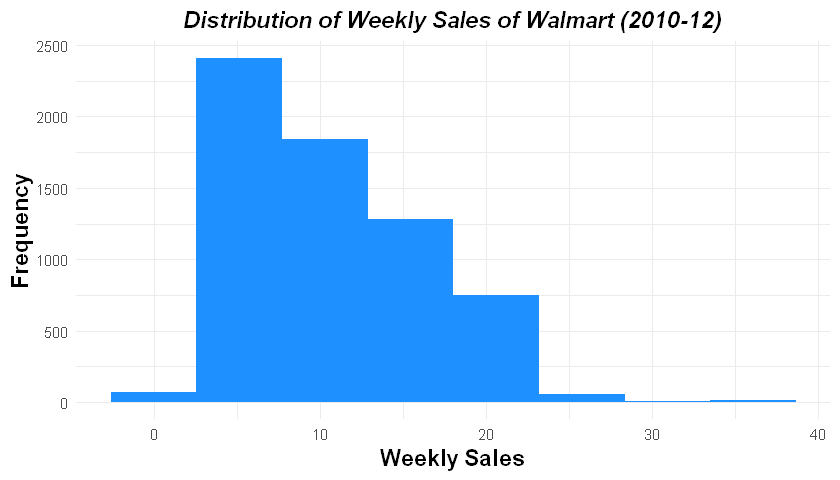

In [39]:
# Distribution of Weekly sales of Walmart for entire year - Histogram

fig(7,4)
walmart_data %>% 
                ggplot(aes(x = Weekly_Sales_Scaled)) +
                geom_histogram(bins=8, fill = 'dodgerblue') +
                ggtitle("Distribution of Weekly Sales of Walmart (2010-12)") +
                xlab("Weekly Sales") + ylab("Frequency") +
                theme_minimal() +
                theme(
                    plot.title = element_text(color="black", size=14, face="bold.italic", hjust = 0.5),
                    axis.title.x = element_text(color="black", size=14, face="bold"),
                    axis.title.y = element_text(color="black", size=14, face="bold")) 

 - **From the above graph, we see that weekly sales of Walmart for Year 2010-12 is not evenly distributed.** 
 - **There are outliers at the extreme right.**

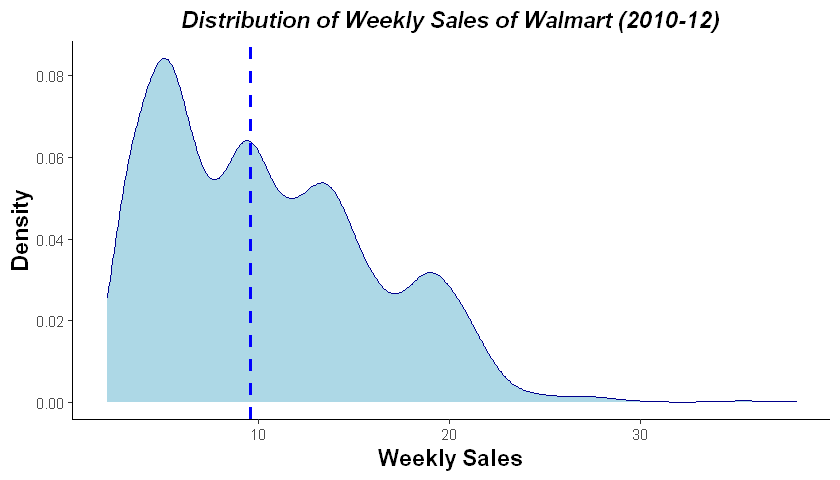

In [40]:
# Distribution of Weekly sales of Walmart for entire year - Density Curve

fig(7,4)
walmart_data %>% 
                ggplot(aes(x = Weekly_Sales_Scaled)) +
                geom_density(color="darkblue", fill="lightblue") +
                geom_vline(aes(xintercept=median(Weekly_Sales_Scaled)),color="blue", linetype="dashed", size=1) +
                ggtitle("Distribution of Weekly Sales of Walmart (2010-12)") +
                xlab("Weekly Sales") + ylab("Density") +
                theme_classic() +
                theme(
                    plot.title = element_text(color="black", size=14, face="bold.italic", hjust = 0.5),
                    axis.title.x = element_text(color="black", size=14, face="bold"),
                    axis.title.y = element_text(color="black", size=14, face="bold")) 

- **This graph confirms that the data distribution is skewed.**  
- **There are outliers at the extreme right, that is, the data is right skewed.**

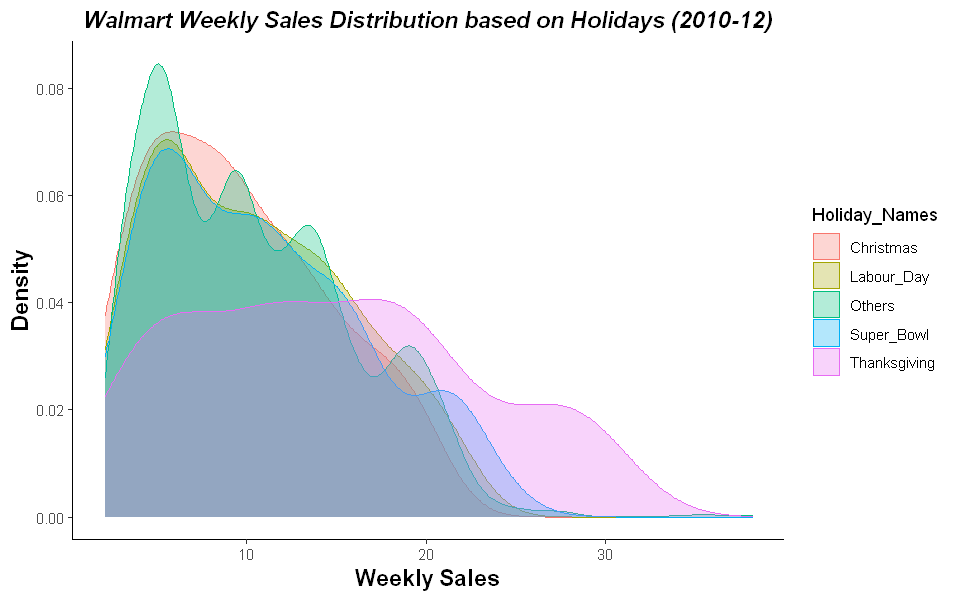

In [41]:
# Distribution of Weekly sales for entire year - Density Curve based on holidays

fig(8,5)
walmart_data %>% 
                ggplot(aes(x = Weekly_Sales_Scaled, fill = Holiday_Names, colour = Holiday_Names)) +
                geom_density(alpha = 0.3) +
                ggtitle("Walmart Weekly Sales Distribution based on Holidays (2010-12)") +
                xlab("Weekly Sales") + ylab("Density") +
                theme_classic() +
                theme(
                    plot.title = element_text(color="black", size=14, face="bold.italic", hjust = 0.5),
                    axis.title.x = element_text(color="black", size=14, face="bold"),
                    axis.title.y = element_text(color="black", size=14, face="bold")) 

- **The above graph is the distribution of sales based on the specific holidays.** 
- **In all the holiday cases, the Sales distribution is approximately right skewed**
- **Thanksgiving Sales distribuiton is slightly fatter and is more spread compared to other holiday sales**

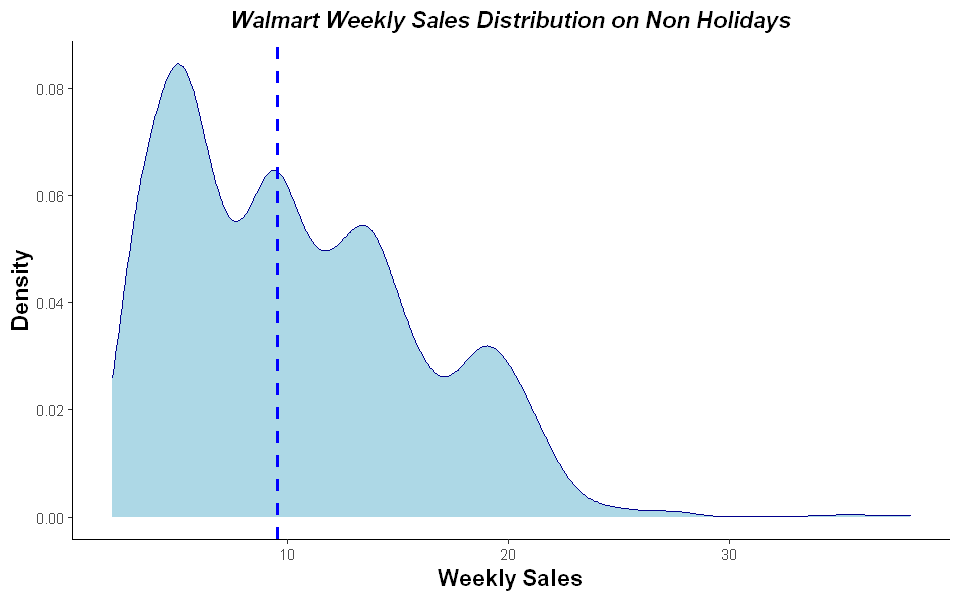

In [42]:
# Distribution of Weekly sales for entire year - Density Curve based on non-holidays

walmart_data[walmart_data$Holiday_Flag == 0, ] %>% 
                ggplot(aes(x = Weekly_Sales_Scaled)) +
                geom_density(color="darkblue", fill="lightblue") +
                geom_vline(aes(xintercept=median(Weekly_Sales_Scaled)),color="blue", linetype="dashed", size=1) +
                ggtitle("Walmart Weekly Sales Distribution on Non Holidays") +
                xlab("Weekly Sales") + ylab("Density") +
                theme_classic() +
                theme(
                    plot.title = element_text(color="black", size=14, face="bold.italic", hjust = 0.5),
                    axis.title.x = element_text(color="black", size=14, face="bold"),
                    axis.title.y = element_text(color="black", size=14, face="bold")) 

- **Distribution of Weekly Sales of Walmart on Non holidays is more or less similar to holiday sales,** 
- **The distribution is right skewed**

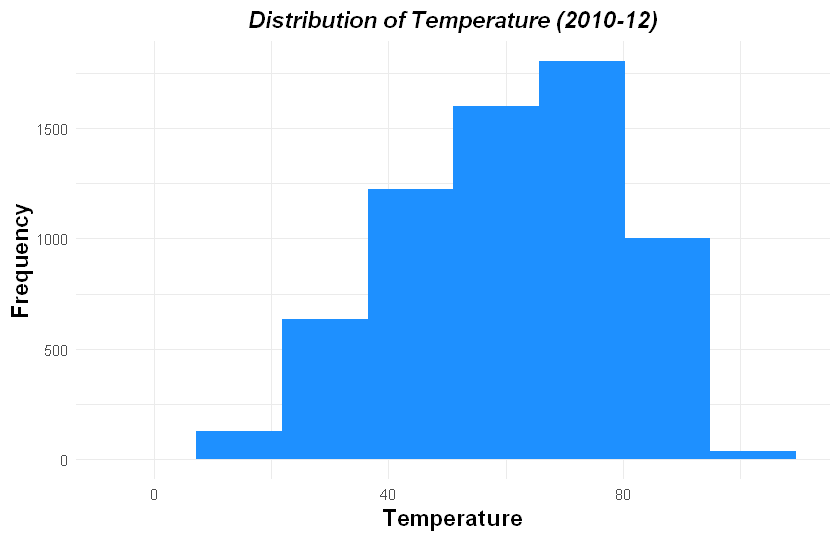

In [43]:
# Distribtuion of Temperature - Histogram

fig(7,4.5)

walmart_data %>%
                ggplot(aes(x = Temperature)) + 
                geom_histogram(bins = 8, fill = 'dodgerblue') +
                ggtitle("Distribution of Temperature (2010-12)") +
                xlab("Temperature") + ylab("Frequency") +
                theme_minimal() +
                theme(
                    plot.title = element_text(color="black", size=14, face="bold.italic", hjust = 0.5),
                    axis.title.x = element_text(color="black", size=14, face="bold"),
                    axis.title.y = element_text(color="black", size=14, face="bold")) 

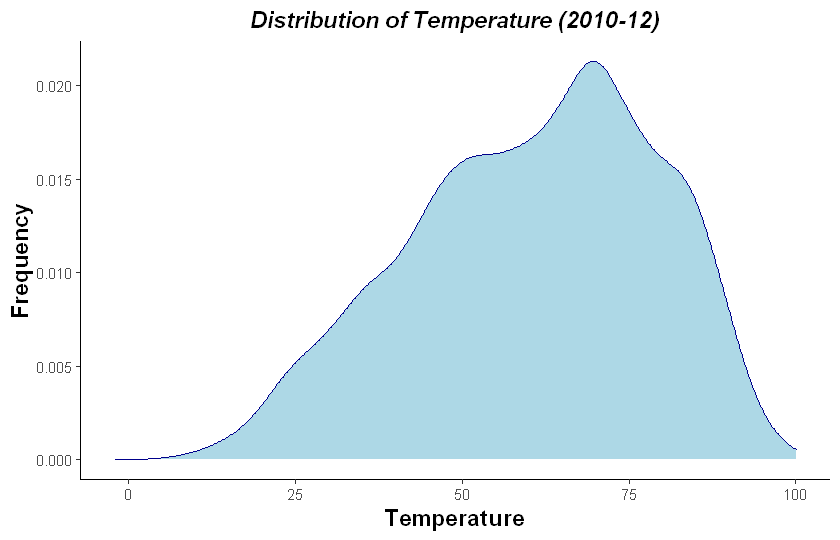

In [44]:
# Distribtuion of Temperature - Density Curve

fig(7,4.5)

walmart_data %>%
                ggplot(aes(x = Temperature)) + 
                geom_density(color="darkblue", fill="lightblue") +
                ggtitle("Distribution of Temperature (2010-12)") +
                xlab("Temperature") + ylab("Frequency") +
                theme_classic() +
                theme(
                    plot.title = element_text(color="black", size=14, face="bold.italic", hjust = 0.5),
                    axis.title.x = element_text(color="black", size=14, face="bold"),
                    axis.title.y = element_text(color="black", size=14, face="bold")) 

- **The Temperature distribution is skewed towards left, i.e. it looks like few outliars are present to the left to the graph.**
- **We shall look for the outliers and treat them while building the predictive model**

In [45]:
colnames(walmart_data)

[1] "Store"               "Date"                "Weekly_Sales"       
 [4] "Holiday_Flag"        "Temperature"         "Fuel_Price"         
 [7] "CPI"                 "Unemployment"        "Weekly_Sales_Scaled"
[10] "Super_Bowl"          "Labour_Day"          "Thanksgiving"       
[13] "Christmas"           "Holiday_Names"       "Day"                
[16] "Month"               "Year"                "Quarter"            
[19] "Month_Name"

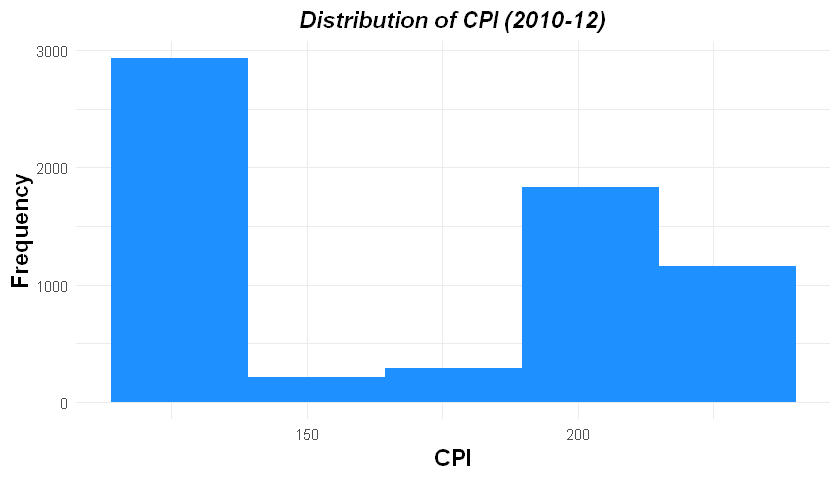

In [46]:
## Distribtuion of CPI - Histogram

fig(7,4)
walmart_data %>%
                ggplot(aes(x=CPI)) +
                geom_histogram(bins = 5, fill = 'dodgerblue') + 
                ggtitle("Distribution of CPI (2010-12)") +
                xlab("CPI") + ylab("Frequency") +
                theme_minimal() +
                theme(
                    plot.title = element_text(color="black", size=14, face="bold.italic", hjust = 0.5),
                    axis.title.x = element_text(color="black", size=14, face="bold"),
                    axis.title.y = element_text(color="black", size=14, face="bold")) 

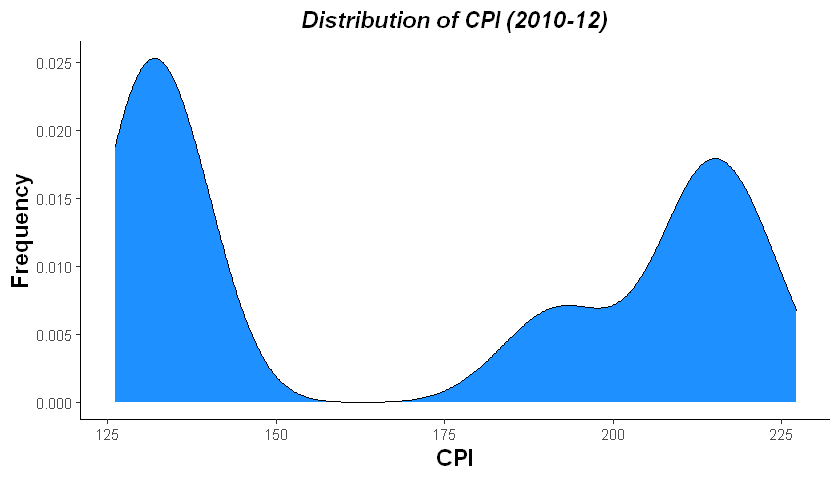

In [47]:
# Distribtuion of CPI - Density Curve

fig(7,4)
walmart_data %>%
                ggplot(aes(x=CPI)) +
                geom_density(fill = 'dodgerblue') + 
                ggtitle("Distribution of CPI (2010-12)") +
                xlab("CPI") + ylab("Frequency") +
                theme_classic() +
                theme(
                    plot.title = element_text(color="black", size=14, face="bold.italic", hjust = 0.5),
                    axis.title.x = element_text(color="black", size=14, face="bold"),
                    axis.title.y = element_text(color="black", size=14, face="bold")) 

- **The distribtuion of CPI is irregular.**
- **Analysis of this variable along with weekly sales year wise willl give more insights, which is done on the later section**

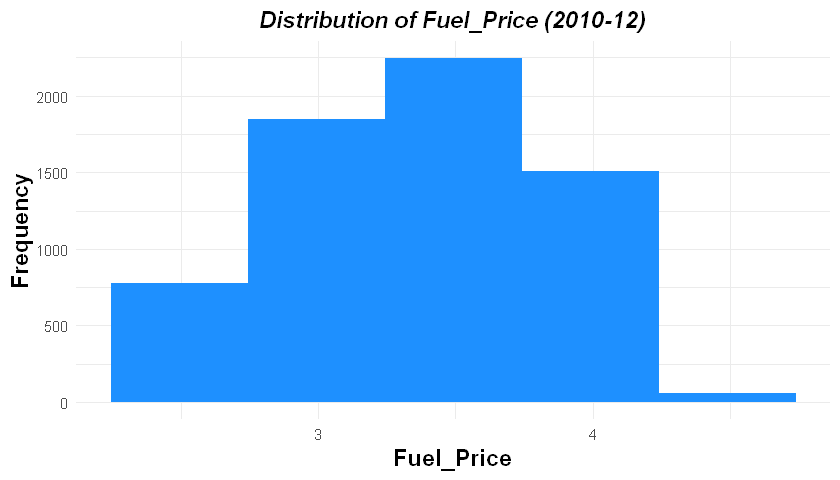

In [48]:
# Distribtuion of Fuel Price - Histogram

fig(7,4)
walmart_data %>%
                ggplot(aes(x=Fuel_Price)) +
                geom_histogram(bins = 5, fill = 'dodgerblue') + 
                ggtitle("Distribution of Fuel_Price (2010-12)") +
                xlab("Fuel_Price") + ylab("Frequency") +
                theme_minimal() +
                theme(
                    plot.title = element_text(color="black", size=14, face="bold.italic", hjust = 0.5),
                    axis.title.x = element_text(color="black", size=14, face="bold"),
                    axis.title.y = element_text(color="black", size=14, face="bold")) 

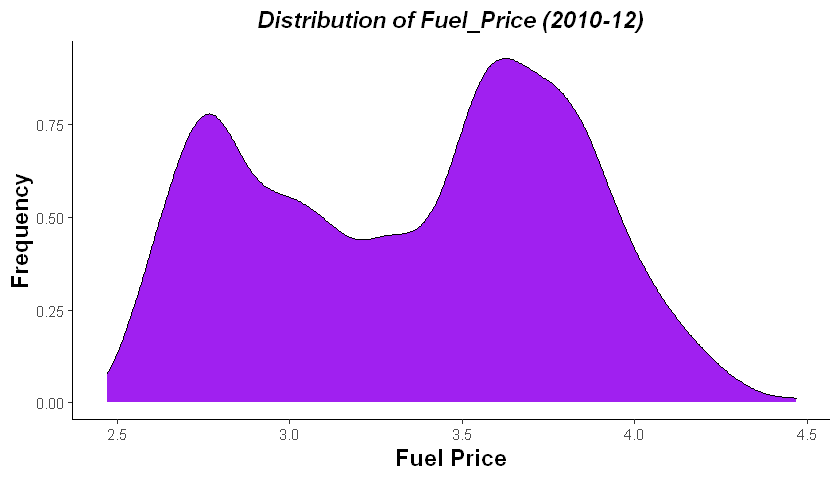

In [49]:
# Distribtuion of Fuel Price - Density Curve

fig(7,4)
walmart_data %>%
                ggplot(aes(x=Fuel_Price)) +
                geom_density(fill = 'purple') + 
                ggtitle("Distribution of Fuel_Price (2010-12)") +
                xlab("Fuel Price") + ylab("Frequency") +
                theme_classic() +
                theme(
                    plot.title = element_text(color="black", size=14, face="bold.italic", hjust = 0.5),
                    axis.title.x = element_text(color="black", size=14, face="bold"),
                    axis.title.y = element_text(color="black", size=14, face="bold")) 

- **Distribution of Fuel Price is approximately Normal, having two modes**
- **We don't see any possiblity of outliers, we shall have a look on the boxplots while making predictive model**

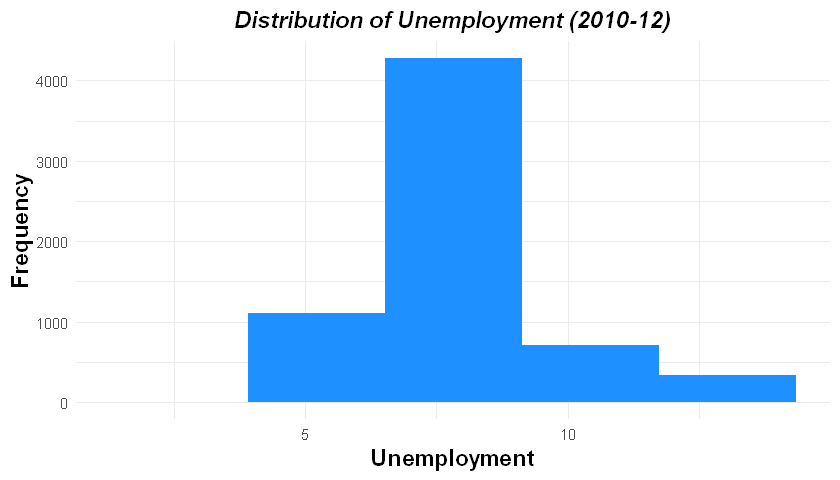

In [50]:
# Distribtuion of Unemployment - Histogram

fig(7,4)
walmart_data %>%
                ggplot(aes(x=Unemployment)) +
                geom_histogram(bins = 5, fill = 'dodgerblue') + 
                ggtitle("Distribution of Unemployment (2010-12)") +
                xlab("Unemployment") + ylab("Frequency") +
                theme_minimal() +
                theme(
                    plot.title = element_text(color="black", size=14, face="bold.italic", hjust = 0.5),
                    axis.title.x = element_text(color="black", size=14, face="bold"),
                    axis.title.y = element_text(color="black", size=14, face="bold")) 

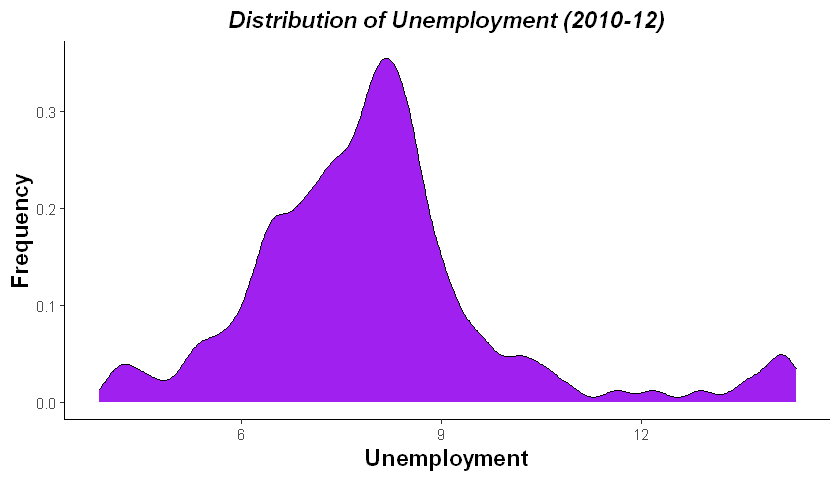

In [51]:
# Distribtuion of Unemployment - Density Curve

fig(7,4)
walmart_data %>%
                ggplot(aes(x=Unemployment)) +
                geom_density(fill = 'purple') + 
                ggtitle("Distribution of Unemployment (2010-12)") +
                xlab("Unemployment") + ylab("Frequency") +
                theme_classic() +
                theme(
                    plot.title = element_text(color="black", size=14, face="bold.italic", hjust = 0.5),
                    axis.title.x = element_text(color="black", size=14, face="bold"),
                    axis.title.y = element_text(color="black", size=14, face="bold")) 

- **Unemployment is approximately normally distributed.** 
- **We don't see possiblity of outliers here too.**

In [52]:
colnames(walmart_data) # viewing the column names of 'walmart_data'

[1] "Store"               "Date"                "Weekly_Sales"       
 [4] "Holiday_Flag"        "Temperature"         "Fuel_Price"         
 [7] "CPI"                 "Unemployment"        "Weekly_Sales_Scaled"
[10] "Super_Bowl"          "Labour_Day"          "Thanksgiving"       
[13] "Christmas"           "Holiday_Names"       "Day"                
[16] "Month"               "Year"                "Quarter"            
[19] "Month_Name"

In [53]:
# Creating a new variable year_wise_data, which includes the central values (mean, median) of 
# CPI, Temperature, Fuel_Price, Unemployment and the sum of sales based on group (Year)

year_wise_data <- 
                    walmart_data %>%
                    group_by(Year) %>%
                    summarise(CPI = median(CPI), 
                              Temperature = mean(Temperature), 
                              Fuel_Price = mean(Fuel_Price),
                              Unemployment = mean(Unemployment), 
                              Sales = sum(Weekly_Sales_Scaled), .groups = 'keep')
year_wise_data[, -1] <- round(year_wise_data[,-1], 2)
year_wise_data$Year <- as.character(year_wise_data$Year)

In [54]:
year_wise_data # viewing the year_wise_data

Year,CPI,Temperature,Fuel_Price,Unemployment,Sales
2010,182.04,60.27,2.82,8.49,22888.86
2011,185.27,58.80,3.56,8.08,24482.00
2012,190.46,63.36,3.71,7.35,20001.33


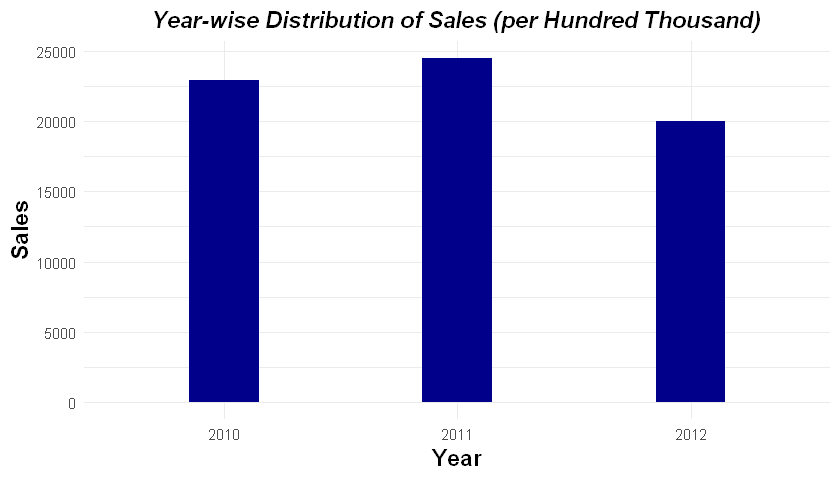

In [55]:
# Bar plot to show the yearly sales of Walmart

fig(7,4)
year_wise_data %>%
                ggplot(aes(y=Sales, x=Year)) +
                geom_bar(fill = 'darkblue', stat="identity", width = 0.3) + 
                ggtitle("Year-wise Distribution of Sales (per Hundred Thousand)") +
                ylab("Sales") + xlab("Year") +
                theme_minimal() +
                theme(
                    plot.title = element_text(color="black", size=14, face="bold.italic", hjust = 0.5),
                    axis.title.x = element_text(color="black", size=14, face="bold"),
                    axis.title.y = element_text(color="black", size=14, face="bold")) 

- **2011, has recorded the highest sales, higher than the previous year 2010.** 
- **There is a dip in sales in the following year 2012**
- **However, we are not sure if the sales were actually lower, since we dont have data of Nov & Dec, where sales might have peaked**

In [56]:
year_wise_data$Sales <- year_wise_data$Sales/10000 # Scaling down Sales to make it comparable to other columns

In [57]:
year_wise_data

Year,CPI,Temperature,Fuel_Price,Unemployment,Sales
2010,182.04,60.27,2.82,8.49,2.288886
2011,185.27,58.80,3.56,8.08,2.448200
2012,190.46,63.36,3.71,7.35,2.000133


- **Now in order to see the sales along with the variables like CPI, Temperature, Feul_Price, Unemployment,**
- **We need to adjust the data. This is achieved using 'gather' function of tidyr library.**
- **This adjustment is done for all the variables to plot them as side by side bar charts with sales to see if sales and these**
- **variables follow some pattern or are related.**

In [58]:
tidy_year_wise_data <- gather(year_wise_data, Category, Value, Unemployment:Sales)
tidy_year_wise_data

Year,CPI,Temperature,Fuel_Price,Category,Value
2010,182.04,60.27,2.82,Unemployment,8.490000
2011,185.27,58.80,3.56,Unemployment,8.080000
2012,190.46,63.36,3.71,Unemployment,7.350000
2010,182.04,60.27,2.82,Sales,2.288886
2011,185.27,58.80,3.56,Sales,2.448200
2012,190.46,63.36,3.71,Sales,2.000133


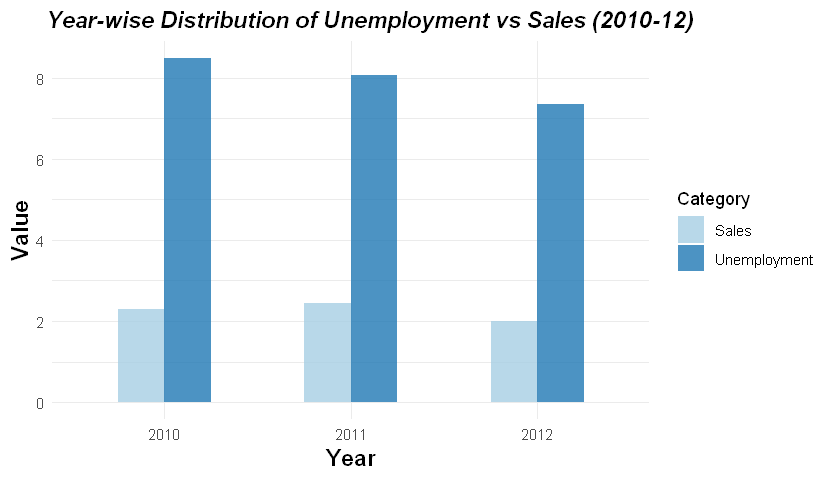

In [59]:
# Side by side bar-plot of Sales with unemployment, per year

fig(7,4)
tidy_year_wise_data %>%
                ggplot(aes(y=Value, x=Year, fill = Category)) +
                geom_bar(stat="identity", position = 'dodge', width = 0.5, alpha = 0.8) + # position = 'dodge' so the bars are not stacked.
                scale_fill_brewer(palette = "Paired") +
                ggtitle("Year-wise Distribution of Unemployment vs Sales (2010-12)") +
                ylab("Value") + xlab("Year") +
                theme_minimal() +
                theme(
                    plot.title = element_text(color="black", size=14, face="bold.italic", hjust = 0.1),
                    axis.title.x = element_text(color="black", size=14, face="bold"),
                    axis.title.y = element_text(color="black", size=14, face="bold")) 

- **From the above figure, we don't observe any specific pattern of Unemployment with sales.** 
- **When sales incresed from 2010 to 2011, unemployment decreased. When sales decreased from 2011 to 2012,** 
- **unemployment further decresed. Therefore, there is no relationship between sales and unemployment as such.**
- **However, one observation is that as the year passes, unemployment has decreased.** 

In [60]:
# Making two columns as variable names in one column and their respective values as another column to plot side by side bar-plot

tidy_year_wise_data <- gather(year_wise_data[c('Year', 'Fuel_Price', 'Sales')], Category, Value, Fuel_Price:Sales)
tidy_year_wise_data

Year,Category,Value
2010,Fuel_Price,2.820000
2011,Fuel_Price,3.560000
2012,Fuel_Price,3.710000
2010,Sales,2.288886
2011,Sales,2.448200
2012,Sales,2.000133


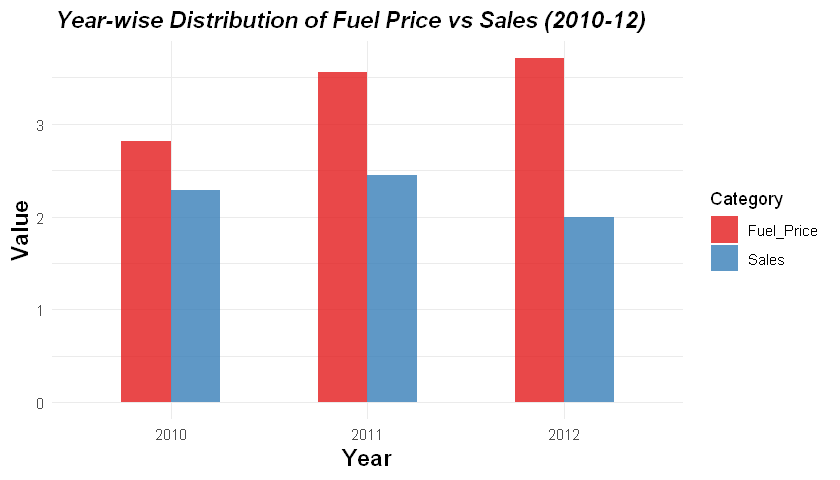

In [61]:
# Side by side bar-plot of Sales with Fuel Price, per year

fig(7,4)
tidy_year_wise_data %>%
                ggplot(aes(y=Value, x=Year, fill = Category)) +
                geom_bar(stat="identity", position = 'dodge', width = 0.5, alpha = 0.8) + 
                # position = 'dodge' so the bars are not stacked.
                scale_fill_brewer(palette = "Set1") +
                ggtitle("Year-wise Distribution of Fuel Price vs Sales (2010-12)") +
                ylab("Value") + xlab("Year") +
                theme_minimal() +
                theme(
                    plot.title = element_text(color="black", size=14, face="bold.italic", hjust = 0.1),
                    axis.title.x = element_text(color="black", size=14, face="bold"),
                    axis.title.y = element_text(color="black", size=14, face="bold")) 

- **From the above figure, we don't observe any specific pattern of Fuel Price with Sales** 
- **When sales incresed from 2010 to 2011, Fuel Price also increased. When sales decreased from 2011 to 2012,** 
- **Fuel prices further increased. Therefore, there is no relationship between sales and unemployment as such.**
- **However, one observation is that as the year passes, the fuel prices have increased.**

In [62]:
# Making adjustment of data similar to previous code to make side by side bar plot

year_wise_data$Sales <- year_wise_data$Sales*10 # Scaling up Sales to make it comparable to Temperature column

tidy_year_wise_data <- gather(year_wise_data[c('Year', 'Temperature', 'Sales')], Category, Value, Temperature:Sales)
tidy_year_wise_data

Year,Category,Value
2010,Temperature,60.27000
2011,Temperature,58.80000
2012,Temperature,63.36000
2010,Sales,22.88886
2011,Sales,24.48200
2012,Sales,20.00133


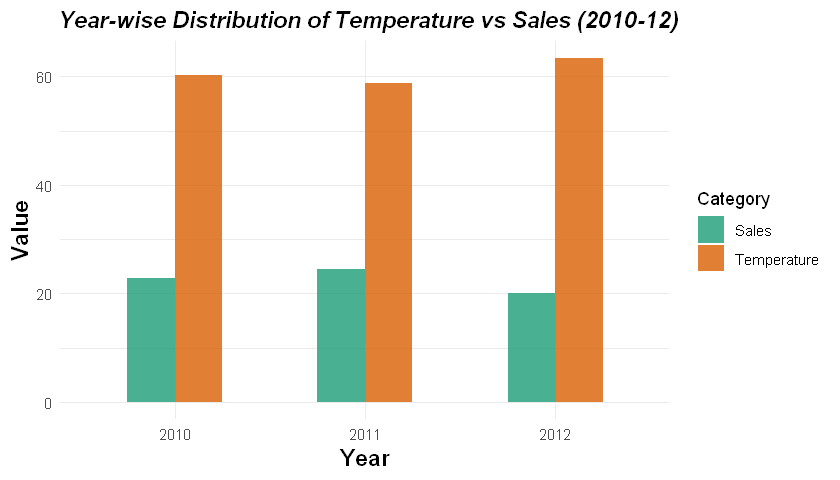

In [63]:
# Side by side bar-plot of Sales with Temperature, per year

fig(7,4)
tidy_year_wise_data %>%
                ggplot(aes(y=Value, x=Year, fill = Category)) +
                geom_bar(stat="identity", position = 'dodge', width = 0.5, alpha = 0.8) + 
                scale_fill_brewer(palette = "Dark2") +
                ggtitle("Year-wise Distribution of Temperature vs Sales (2010-12)") +
                ylab("Value") + xlab("Year") +
                theme_minimal() +
                theme(
                    plot.title = element_text(color="black", size=14, face="bold.italic", hjust = 0.1),
                    axis.title.x = element_text(color="black", size=14, face="bold"),
                    axis.title.y = element_text(color="black", size=14, face="bold")) 

- **From the above figure, we observe that temperature might be inversely related to sales**
- **When average temperature decreased from 2010 to 2011, Sales increased. When average temperature increased from 2011 to 2012, sales decreased.**
- **However, since the data for Nov and Dec Month is not available with us for 2012 year sales and temperature, we cannot conclude this relationship with confidence. Further statistical tests are needed to confirm this**
- **We have considered correlation coefficient as the basis to conclude if the variable is related with another variable or not.**

In [64]:
# adjustment of data with gather function to create side by side bar plot

year_wise_data$Sales <- year_wise_data$Sales*10 # Scaling up Sales to make it comparable to Temperature column

tidy_year_wise_data <- gather(year_wise_data[c('Year', 'CPI', 'Sales')], Category, Value, CPI:Sales)
tidy_year_wise_data

Year,Category,Value
2010,CPI,182.0400
2011,CPI,185.2700
2012,CPI,190.4600
2010,Sales,228.8886
2011,Sales,244.8200
2012,Sales,200.0133


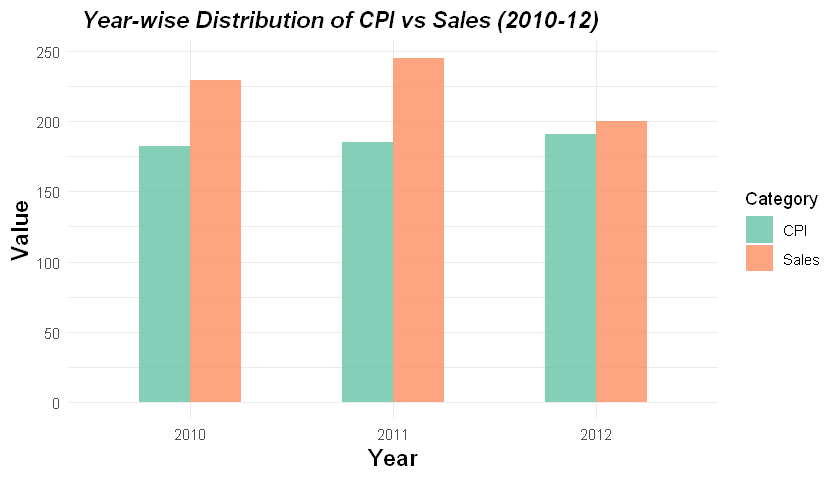

In [65]:
# Side by side bar-plot of CPI with Sales, per year

fig(7,4)
tidy_year_wise_data %>%
                ggplot(aes(y=Value, x=Year, fill = Category)) +
                geom_bar(stat="identity", position = 'dodge', width = 0.5, alpha = 0.8) + 
                scale_fill_brewer(palette = "Set2") +
                ggtitle("Year-wise Distribution of CPI vs Sales (2010-12)") +
                ylab("Value") + xlab("Year") +
                theme_minimal() +
                theme(
                    plot.title = element_text(color="black", size=14, face="bold.italic", hjust = 0.1),
                    axis.title.x = element_text(color="black", size=14, face="bold"),
                    axis.title.y = element_text(color="black", size=14, face="bold")) 

- **CPI gives an idea of the cost of living. Inflation is measured using CPI.** 
- **Higher CPI indicates the increase in prices of a representative basket of goods consumed.** <br><br>
- **From the above figure, we see CPI has increased with the passage of time.**
- **Sales have also increased from year 2010 to 2011, however it has decreased from 2011 t0 2012. 2012 sales are ambiguious because of non availablity of Data for 2012 Nov and Dec month. It might have been the case that 2012 sales were higher than 2011, due to  New Year and Christmas eve, but anyways, we cannot conclude the trend of CPI and sales form 2011 to 2012.**
- **For the period 2010 to 2011, the positive relationship between Sales and CPI is actually surprising because higher CPI should lower the sales, as per logic that higher CPI leads to increases the representative basket price**
- **The sales might have been high due to other cofounding variables e.g. discounts provided on holidays and festivals.**

## D. Analysis - Basic Statistics tasks 

### 1. Which store has maximum sales?

In [66]:
# Preparing data with store wise Sales and Deviation and Coeff. of Deviation

store_wise_sales = walmart_data %>%
                        group_by(Store) %>%
                        summarise(Total_sales = round(sum(Weekly_Sales),2),
                                  Deviation = round(sd(Weekly_Sales),2), 
                                  Coeff_of_variation = round(mean(Weekly_Sales)/sd(Weekly_Sales),2),
                                  .groups = 'keep')
store_wise_sales <- as.data.frame(store_wise_sales)
head(store_wise_sales)

Store,Total_sales,Deviation,Coeff_of_variation
1,222402808.85,155980.77,9.97
2,275382440.98,237683.69,8.10
3,57586735.07,46319.63,8.69
4,299543953.38,266201.44,7.87
5,45475688.90,37737.97,8.43
6,223756130.64,212525.86,7.36


In [67]:
# Filtering the data based on Max Sales

max_sales = filter(store_wise_sales, Total_sales == max(Total_sales))
max_sales

Store,Total_sales,Deviation,Coeff_of_variation
20,301397792.46,275900.56,7.64


In [68]:
print(paste('Store', max_sales['Store'], 'has maximum sales of', max_sales['Total_sales']))

[1] "Store 20 has maximum sales of 301397792.46"


### Ans: Store 20 has maximum sales of 301397792.46

### 2. Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation?

In [69]:
# Filtering the data based on Max Deviation

max_store_sd = filter(store_wise_sales, Deviation == max(Deviation))
max_store_sd

Store,Total_sales,Deviation,Coeff_of_variation
14,288999911.34,317569.95,6.36


In [70]:
print(paste('Store', max_store_sd['Store'], 'sales vary a lot, has maximum Standard Deviation of', max_sales['Total_sales'], 
            'with Coefficient of variation of:', max_store_sd['Coeff_of_variation']))

[1] "Store 14 sales vary a lot, has maximum Standard Deviation of 301397792.46 with Coefficient of variation of: 6.36"


### Ans: Store 14 sales vary a lot, has maximum Standard Deviation of 301397792.46 with Coefficient of variation of: 6.36

### 3. Which store/s has good quarterly growth rate in Q3’2012?

In [71]:
colnames(walmart_data)

[1] "Store"               "Date"                "Weekly_Sales"       
 [4] "Holiday_Flag"        "Temperature"         "Fuel_Price"         
 [7] "CPI"                 "Unemployment"        "Weekly_Sales_Scaled"
[10] "Super_Bowl"          "Labour_Day"          "Thanksgiving"       
[13] "Christmas"           "Holiday_Names"       "Day"                
[16] "Month"               "Year"                "Quarter"            
[19] "Month_Name"

In [72]:
# Getting data based on Year, Quarter and Sales on those period

year_wise_quater_data <- walmart_data %>%
                                            group_by(Year, Quarter) %>%
                                            summarise(Sales = round(sum(Weekly_Sales_Scaled),2), .groups = 'keep')
year_wise_quater_data

Year,Quarter,Sales
2010,1,3722.53
2010,2,6103.69
2010,3,5974.88
2010,4,7087.76
2011,1,5293.92
2011,2,5979.48
2011,3,6393.58
2011,4,6815.02
2012,1,5924.68
2012,2,6182.98


In [73]:
# Converting first two columns as factor, this is needed in making graphs

year_wise_quater_data[, 1:2] <- sapply(year_wise_quater_data[, 1:2], as.factor)
year_wise_quater_data

Year,Quarter,Sales
2010,1,3722.53
2010,2,6103.69
2010,3,5974.88
2010,4,7087.76
2011,1,5293.92
2011,2,5979.48
2011,3,6393.58
2011,4,6815.02
2012,1,5924.68
2012,2,6182.98


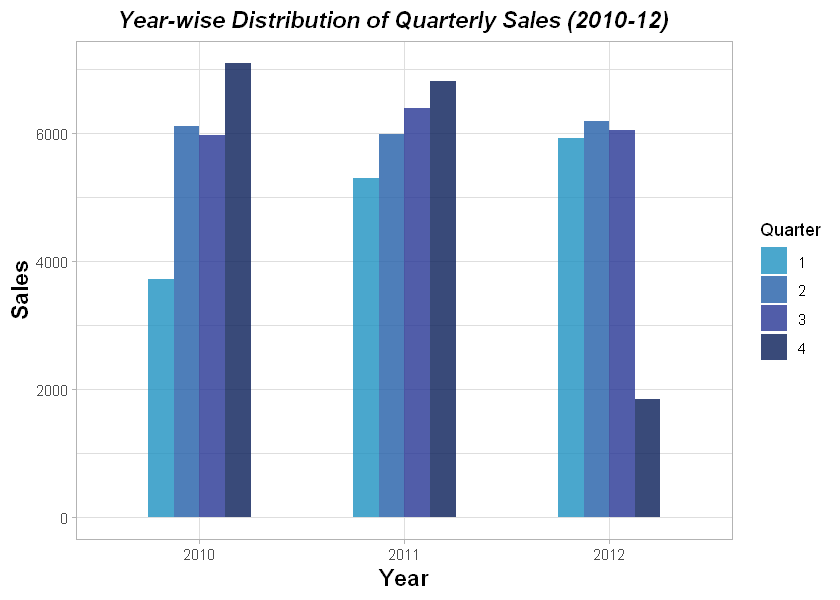

In [74]:
my_palette <- brewer.pal(name="YlGnBu",n=9)[6:9] # selected a custom palette, where out of 9 colors, last four are selected


# Making the side by side bar graph for Sales per quarter, year-wise

fig(7,5) 
year_wise_quater_data %>%
                ggplot(aes(y=Sales, x=Year, fill = Quarter)) +
                geom_bar(stat="identity", position = 'dodge', width = 0.5, alpha = 0.8) + 
                # position = 'dodge' so the bars are not stacked.
                scale_fill_manual(values = my_palette) +
                ggtitle("Year-wise Distribution of Quarterly Sales (2010-12)") +
                ylab("Sales") + xlab("Year") +
                theme_light() +
                theme(
                    plot.title = element_text(color="black", size=14, face="bold.italic", hjust = 0.4),
                    axis.title.x = element_text(color="black", size=14, face="bold"),
                    axis.title.y = element_text(color="black", size=14, face="bold")) 

 <font size="4"> <b>Year wise Analysis</b> </font>

- **Year 2010** 
    - **Has growing trend of sales, quarter wise**
    - **Highest quarter growth was recorded in Q4, highest among all the years**
    - **Lowest sales was recorded in Q1**
- **Year 2011**
    - **Has growing trend of sales, quarter wise**
    - **Q4 recorded the highest Sales,** 
    - **Lowest sales were recorded Q1**
- **Year 2012**
    - **Q2 recorded highest sales, Q1 and Q3 relatively lower**
    - **Q4 has lowest sales, still we cannot comment on Q4 sales as we don't have data for Nov & Dec month of this Year**


<font size="4"> <b>Quarter wise Analysis: </b> </font>

- **Quarter 1**
    - **There has been growing trend of Q1 sales across the years**
    - **Each year the sales of Q1 was higher than the previous year's Q1 sales**

- **Quarter 2**
    - **Q2 sales was almost constant for all the years**
    - **There was a dip in sales, though not significant, observed in Q2 of year 2011**

- **Quarter 3**
    - **Q3 sales was almost constant for year 2010 and 2012**
    - **The sales rose in 2011 to significantly higher value**

- **Quarter 4**
    - **Highest Q4 sales was recorded in year 2010**
    - **Observed visible drop in sales in the next following year 2011**
    - **The lowest sales of Q4 was recorded in 2012, based on the available data. We do not have data for Nov and Dec month of this year**



In [75]:
head(walmart_data)

Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales_Scaled,Super_Bowl,Labour_Day,Thanksgiving,Christmas,Holiday_Names,Day,Month,Year,Quarter,Month_Name
1,2010-02-05,1643690.90,0,42.31,2.572,211.0963582,8.106,16.4369090,0,0,0,0,Others,5,2,2010,1,Feb
1,2010-02-12,1641957.44,1,38.51,2.548,211.2421698,8.106,16.4195744,1,0,0,0,Super_Bowl,12,2,2010,1,Feb
1,2010-02-19,1611968.17,0,39.93,2.514,211.2891429,8.106,16.1196817,0,0,0,0,Others,19,2,2010,1,Feb
1,2010-02-26,1409727.59,0,46.63,2.561,211.3196429,8.106,14.0972759,0,0,0,0,Others,26,2,2010,1,Feb
1,2010-03-05,1554806.68,0,46.50,2.625,211.3501429,8.106,15.5480668,0,0,0,0,Others,5,3,2010,1,Mar
1,2010-03-12,1439541.59,0,57.79,2.667,211.3806429,8.106,14.3954159,0,0,0,0,Others,12,3,2010,1,Mar


In [76]:
# filtering the data based on Q3 of year 2012, grouping by Store

q3_store_sales <- walmart_data %>%
                    filter(Year == 2012, Quarter == 3) %>%
                    group_by(Store) %>%
                    summarise(Quaterly_sales = sum(Weekly_Sales),
                             .groups = 'keep')
head(q3_store_sales)

Store,Quaterly_sales
1,20253947.78
2,24303354.86
3,5298005.47
4,27796792.46
5,4163790.99
6,20167312.24


In [77]:
# finding the store having max q3 sales

max_q3_sales_store = q3_store_sales[which.max(q3_store_sales$Quaterly_sales),'Store']
print(paste('Store', max_q3_sales_store, 'has maximum Q3\'2012 sales, of: ', max(q3_store_sales$Quaterly_sales)))

[1] "Store 4 has maximum Q3'2012 sales, of:  27796792.46"


### Ans: Store 4 has maximum Q3'2012 sales, of:  27796792.46 units

### 4. Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

In [78]:
head(walmart_data)

Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales_Scaled,Super_Bowl,Labour_Day,Thanksgiving,Christmas,Holiday_Names,Day,Month,Year,Quarter,Month_Name
1,2010-02-05,1643690.90,0,42.31,2.572,211.0963582,8.106,16.4369090,0,0,0,0,Others,5,2,2010,1,Feb
1,2010-02-12,1641957.44,1,38.51,2.548,211.2421698,8.106,16.4195744,1,0,0,0,Super_Bowl,12,2,2010,1,Feb
1,2010-02-19,1611968.17,0,39.93,2.514,211.2891429,8.106,16.1196817,0,0,0,0,Others,19,2,2010,1,Feb
1,2010-02-26,1409727.59,0,46.63,2.561,211.3196429,8.106,14.0972759,0,0,0,0,Others,26,2,2010,1,Feb
1,2010-03-05,1554806.68,0,46.50,2.625,211.3501429,8.106,15.5480668,0,0,0,0,Others,5,3,2010,1,Mar
1,2010-03-12,1439541.59,0,57.79,2.667,211.3806429,8.106,14.3954159,0,0,0,0,Others,12,3,2010,1,Mar


In [79]:
unique(walmart_data$Holiday_Names) # checking unique holiday names

[1] "Others"       "Super_Bowl"   "Labour_Day"   "Thanksgiving" "Christmas"

In [80]:
# grouping the sales based on holidays and non holidays, and finding the mean sales

holiday_wise_sales <- walmart_data %>%
                                        group_by(Holiday_Flag) %>%
                                        summarise(Mean_Sales = round(mean(Weekly_Sales),2), .groups = 'keep')

In [81]:
holiday_wise_sales

Holiday_Flag,Mean_Sales
0,1041256.38
1,1122887.89


In [82]:
# subsetting the mean sales of non-holiday and storing it in variable

non_holiday_mean_sales <- holiday_wise_sales[1,2]
non_holiday_mean_sales

Mean_Sales
1041256.38


In [83]:
# finding the holidays where we have more sales than average sales of non-holidays

holiday_higher_sales_data <- walmart_data %>%
                                            select(Date, Holiday_Flag, Holiday_Names, Weekly_Sales) %>%
                                            filter(Holiday_Flag == 1) %>%
                                            filter(Weekly_Sales > non_holiday_mean_sales)
head(holiday_higher_sales_data, n=10)

Date,Holiday_Flag,Holiday_Names,Weekly_Sales
2010-02-12,1,Super_Bowl,1641957.44
2010-09-10,1,Labour_Day,1507460.69
2010-11-26,1,Thanksgiving,1955624.11
2010-12-31,1,Christmas,1367320.01
2011-02-11,1,Super_Bowl,1649614.93
2011-09-09,1,Labour_Day,1540471.24
2011-11-25,1,Thanksgiving,2033320.66
2011-12-30,1,Christmas,1497462.72
2012-02-10,1,Super_Bowl,1802477.43
2012-09-07,1,Labour_Day,1661767.33


In [84]:
unique(holiday_higher_sales_data$Holiday_Names) # unique names of holidays where sales was higher than mean of non holidays

[1] "Super_Bowl"   "Labour_Day"   "Thanksgiving" "Christmas"

In [85]:
nrow(holiday_higher_sales_data)

[1] 450

### Ans: There are total of 450 dates (holiday weeks) where the sales was higher than the average of normal (non holidays) sales. These includes - 'Super_Bowl', 'Labour_Day' ,'Thanksgiving', 'Christmas'. Below are the dates for reference:

In [86]:
holiday_higher_sales_data

Date,Holiday_Flag,Holiday_Names,Weekly_Sales
2010-02-12,1,Super_Bowl,1641957.44
2010-09-10,1,Labour_Day,1507460.69
2010-11-26,1,Thanksgiving,1955624.11
2010-12-31,1,Christmas,1367320.01
2011-02-11,1,Super_Bowl,1649614.93
2011-09-09,1,Labour_Day,1540471.24
2011-11-25,1,Thanksgiving,2033320.66
2011-12-30,1,Christmas,1497462.72
2012-02-10,1,Super_Bowl,1802477.43
2012-09-07,1,Labour_Day,1661767.33


In [87]:
# Holiday wise total sales, just for reference

holiday_higher_sales_data %>%
                                group_by(Holiday_Names) %>%
                                summarise(Total_Sales = sum(Weekly_Sales), .groups = 'keep')

Holiday_Names,Total_Sales
Christmas,86474980.04
Labour_Day,140727684.68
Super_Bowl,145682278.34
Thanksgiving,132414608.50


### Provide a monthly and semester view of sales in units and give insights

In [88]:
head(walmart_data)

Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales_Scaled,Super_Bowl,Labour_Day,Thanksgiving,Christmas,Holiday_Names,Day,Month,Year,Quarter,Month_Name
1,2010-02-05,1643690.90,0,42.31,2.572,211.0963582,8.106,16.4369090,0,0,0,0,Others,5,2,2010,1,Feb
1,2010-02-12,1641957.44,1,38.51,2.548,211.2421698,8.106,16.4195744,1,0,0,0,Super_Bowl,12,2,2010,1,Feb
1,2010-02-19,1611968.17,0,39.93,2.514,211.2891429,8.106,16.1196817,0,0,0,0,Others,19,2,2010,1,Feb
1,2010-02-26,1409727.59,0,46.63,2.561,211.3196429,8.106,14.0972759,0,0,0,0,Others,26,2,2010,1,Feb
1,2010-03-05,1554806.68,0,46.50,2.625,211.3501429,8.106,15.5480668,0,0,0,0,Others,5,3,2010,1,Mar
1,2010-03-12,1439541.59,0,57.79,2.667,211.3806429,8.106,14.3954159,0,0,0,0,Others,12,3,2010,1,Mar


In [89]:
class(walmart_data$Month_Name) # checking the class of month_name variable

[1] "ordered" "factor"

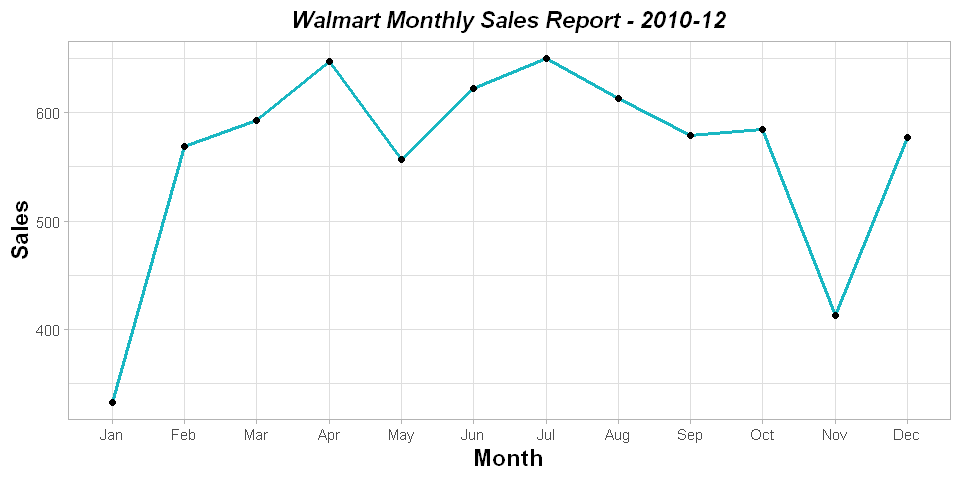

In [90]:
# Viewing month wise total sales for all years of Walmart Data - Line Chart

fig(8,4)
walmart_data %>%
                    group_by(Month_Name) %>%
                    summarise(Total_Sales = sum(Weekly_Sales)/1000000, .groups = 'keep') %>%
                            ggplot(aes(x=Month_Name, y=Total_Sales, group = 1)) +
                            geom_line( color="#00AFBB", size = 1, alpha=0.9, linetype=1) +
                            geom_point() +
                            ggtitle("Walmart Monthly Sales Report - 2010-12") +
                            xlab("Month") + ylab("Sales") +
                            theme_light() +
                            theme(
                                plot.title = element_text(color="black", size=14, face="bold.italic", hjust = 0.5),
                                axis.title.x = element_text(color="black", size=14, face="bold"),
                                axis.title.y = element_text(color="black", size=14, face="bold")) 



- **Above data is grouped by Month for all the years - 2010, 2011, 2012**
- **April and July Month recorded the highest sales**
- **Lowest sales was recorded in the Month of January**
- **Starting from Jan, the sales rose till April**
- **From April, observed dip in sales, significantly lower than Feb Month**
- **Another dip in sales was observed after July, till September.**
- **Significant loss of sales was observed after Oct till November, after which there was some rise in sales.**


In [91]:
# grouping the data first based on year and than based on Month_name, and storing it in a variable for future use

Year_wise_monthly_sales <- walmart_data %>%
                                            group_by(Year, Month_Name) %>%
                                            summarise(Total_Sales = sum(Weekly_Sales)/1000000, .groups = 'keep')
head(Year_wise_monthly_sales, n=10)

Year,Month_Name,Total_Sales
2010,Feb,190.33298304
2010,Mar,181.91980250
2010,Apr,231.41236805
2010,May,186.71093434
2010,Jun,192.24617236
2010,Jul,232.58012598
2010,Aug,187.64011089
2010,Sep,177.26789637
2010,Oct,217.16182402
2010,Nov,202.85337014


In [92]:
# changing the data type of Year to factor, to use it in plotting graphs

Year_wise_monthly_sales$Year <- as.factor(Year_wise_monthly_sales$Year)
head(Year_wise_monthly_sales)

Year,Month_Name,Total_Sales
2010,Feb,190.33298304
2010,Mar,181.91980250
2010,Apr,231.41236805
2010,May,186.71093434
2010,Jun,192.24617236
2010,Jul,232.58012598


In [93]:
class(Year_wise_monthly_sales$Year) # checking the class of Year variable 

[1] "factor"

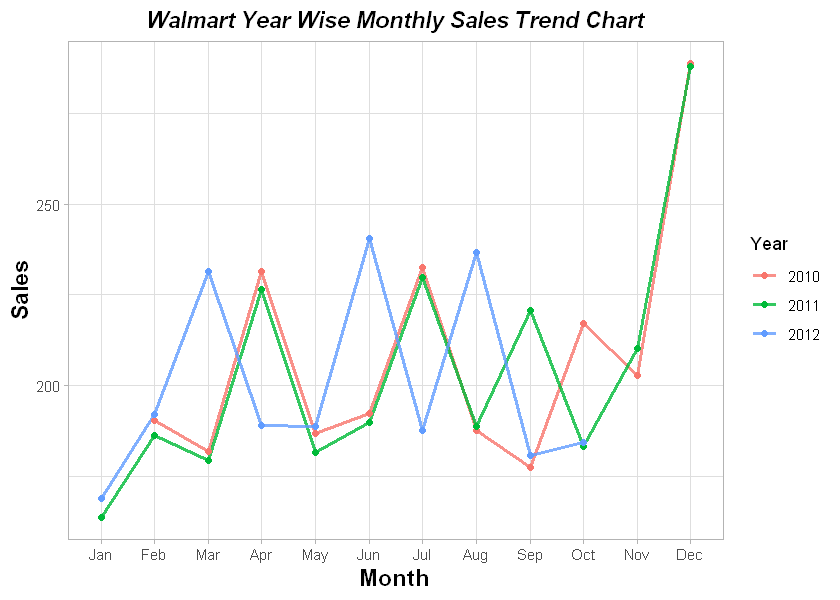

In [94]:
# Line chart of Sales based on Year - Monthwise


fig(7,5)
ggplot(Year_wise_monthly_sales, aes(Month_Name, Total_Sales, group=Year, colour=Year)) +
geom_line(size = 1, alpha=0.8, linetype=1) +
geom_point() +
ggtitle("Walmart Year Wise Monthly Sales Trend Chart") +
xlab("Month") + ylab("Sales") +
theme_light() +
theme(
        plot.title = element_text(color="black", size=14, face="bold.italic", hjust = 0.5),
        axis.title.x = element_text(color="black", size=14, face="bold"),
        axis.title.y = element_text(color="black", size=14, face="bold")) 

- **Data was grouped based on Year first and than after based on Months**
- **Pink and Green lines (Sales of 2010 and 2011) is similar from Feb till August**
- **From Aug to Sept, pink line falls down (sales of 2010 dips) where as green line picks up (sales of 2011 increases)**
- **Vice versa happens from Sept to Oct, where 2010 sales rises and 2011 sales drops, significantly**
- **Nov to Dec both 2010 and 2011 sales rises**
- **2012 Trends follows a different pattern altogether, a zig zag line, indicates the unpredictable sales**
- **There could be many reasons for this, external factors, insufficient stocks and unforeseen demands, this needs  further investigation**


In [95]:
# New variable created, grouping Sales based of year first and than on quarter

quarter_wise_sales <- walmart_data %>%
                                            group_by(Year, Quarter) %>%
                                            summarise(Total_Sales = sum(Weekly_Sales)/1000000, .groups = 'keep')
quarter_wise_sales$Quarter <- as.factor(quarter_wise_sales$Quarter)
quarter_wise_sales$Year <- as.factor(quarter_wise_sales$Year)

In [96]:
quarter_wise_sales

Year,Quarter,Total_Sales
2010,1,372.25278554
2010,2,610.36947475
2010,3,597.48813324
2010,4,708.77572688
2011,1,529.39174299
2011,2,597.94805432
2011,3,639.35846954
2011,4,681.50174050
2012,1,592.46770169
2012,2,618.29771469


In [97]:
# Removing Q4 of 2012 since we dont have data for Nov and Dec Month

quarter_wise_sales <- quarter_wise_sales[!(quarter_wise_sales$Year == 2012 & quarter_wise_sales$Quarter == 4),]
quarter_wise_sales

Year,Quarter,Total_Sales
2010,1,372.25278554
2010,2,610.36947475
2010,3,597.48813324
2010,4,708.77572688
2011,1,529.39174299
2011,2,597.94805432
2011,3,639.35846954
2011,4,681.50174050
2012,1,592.46770169
2012,2,618.29771469


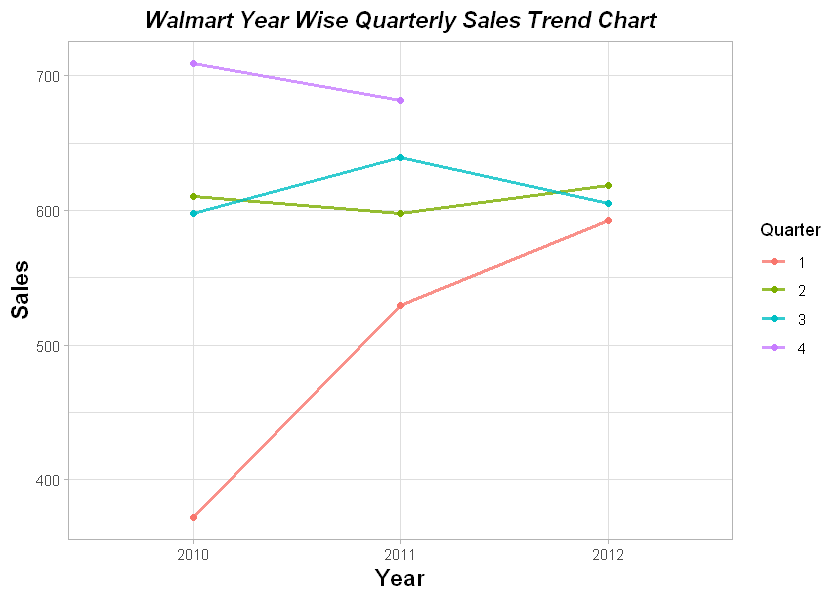

In [98]:
fig(7,5)
ggplot(quarter_wise_sales, aes(Year, Total_Sales, group=Quarter, colour=Quarter)) +
geom_line(size = 1, alpha=0.8, linetype=1) +
geom_point() +
ggtitle("Walmart Year Wise Quarterly Sales Trend Chart") +
xlab("Year") + ylab("Sales") +
theme_light() +
theme(
        plot.title = element_text(color="black", size=14, face="bold.italic", hjust = 0.5),
        axis.title.x = element_text(color="black", size=14, face="bold"),
        axis.title.y = element_text(color="black", size=14, face="bold")) 

- **Q1 sales have a postive slope, the sales of Q1 grew every year. Jan-Feb-Mar is favourable period for Walmart. However, the magnitude of Sales is less than other Quarter sales**
- **Q2 sales have good record than Q1 sales, and is almost constant. A dip was observed in year 2011**
- **Q3 sales started lesser then Q2 sales in year 2010, rose higher in 2011, and closed lesser than Q2 in 2012**
- **Q4 sales has highest magnitude in year 2010, and decreased in 2012, however still closed on highest magnitude among all other quarters. Since Nov and Dec data is not available for 2012, Q4 data is excluded in the plot for 2012.**

In [99]:
head(walmart_data, n=10)

Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales_Scaled,Super_Bowl,Labour_Day,Thanksgiving,Christmas,Holiday_Names,Day,Month,Year,Quarter,Month_Name
1,2010-02-05,1643690.90,0,42.31,2.572,211.0963582,8.106,16.4369090,0,0,0,0,Others,5,2,2010,1,Feb
1,2010-02-12,1641957.44,1,38.51,2.548,211.2421698,8.106,16.4195744,1,0,0,0,Super_Bowl,12,2,2010,1,Feb
1,2010-02-19,1611968.17,0,39.93,2.514,211.2891429,8.106,16.1196817,0,0,0,0,Others,19,2,2010,1,Feb
1,2010-02-26,1409727.59,0,46.63,2.561,211.3196429,8.106,14.0972759,0,0,0,0,Others,26,2,2010,1,Feb
1,2010-03-05,1554806.68,0,46.50,2.625,211.3501429,8.106,15.5480668,0,0,0,0,Others,5,3,2010,1,Mar
1,2010-03-12,1439541.59,0,57.79,2.667,211.3806429,8.106,14.3954159,0,0,0,0,Others,12,3,2010,1,Mar
1,2010-03-19,1472515.79,0,54.58,2.720,211.2156350,8.106,14.7251579,0,0,0,0,Others,19,3,2010,1,Mar
1,2010-03-26,1404429.92,0,51.45,2.732,211.0180424,8.106,14.0442992,0,0,0,0,Others,26,3,2010,1,Mar
1,2010-04-02,1594968.28,0,62.27,2.719,210.8204499,7.808,15.9496828,0,0,0,0,Others,2,4,2010,2,Apr
1,2010-04-09,1545418.53,0,65.86,2.770,210.6228574,7.808,15.4541853,0,0,0,0,Others,9,4,2010,2,Apr


In [100]:
class(walmart_data$Year) # checking class of Year column

[1] "numeric"

In [101]:
# created variable containing 2010 sales grouped by Month

walmart_sales_2010 <- walmart_data %>% 
                                    select(Weekly_Sales_Scaled, Month_Name, Year) %>%
                                    filter(Year == 2010) %>%
                                    group_by(Month_Name) %>%
                                    summarise(Sales = round(sum(Weekly_Sales_Scaled),2), .groups = 'keep')
walmart_sales_2010

Month_Name,Sales
Feb,1903.33
Mar,1819.20
Apr,2314.12
May,1867.11
Jun,1922.46
Jul,2325.80
Aug,1876.40
Sep,1772.68
Oct,2171.62
Nov,2028.53


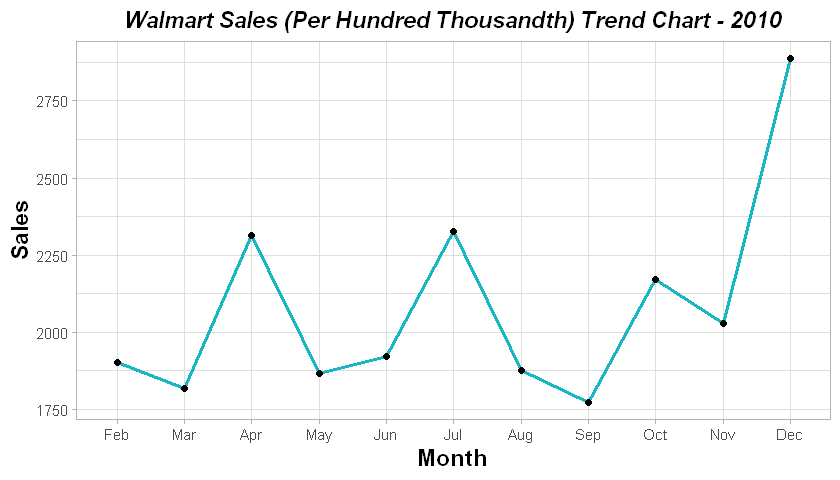

In [102]:
# Month wise sales of Walmart for year 2010

fig(7,4)
ggplot(walmart_sales_2010, aes(x=Month_Name, y=Sales, group = 1)) +
geom_line( color="#00AFBB", size = 1, alpha=0.9, linetype=1) +
geom_point() +
ggtitle("Walmart Sales (Per Hundred Thousandth) Trend Chart - 2010") +
xlab("Month") + ylab("Sales") +
theme_light() +
theme(
        plot.title = element_text(color="black", size=14, face="bold.italic", hjust = 0.5),
        axis.title.x = element_text(color="black", size=14, face="bold"),
        axis.title.y = element_text(color="black", size=14, face="bold")) 

- **Looking at the monthly sales of 2010, Apr, Jul, Oct, Dec have peak sales, Dec being the highest.**
- **Mar, May, Jun, Sept, Nov has downward slopes of trend line, Sep being the lowest among all the sales.**


In [103]:
# created variable containing 2011 sales grouped by Month

walmart_sales_2011 <- walmart_data %>% 
                                    select(Weekly_Sales_Scaled, Month_Name, Year) %>%
                                    filter(Year == 2011) %>%
                                    group_by(Month_Name) %>%
                                    summarise(Sales = round(sum(Weekly_Sales_Scaled),2), .groups = 'keep')
walmart_sales_2011

Month_Name,Sales
Jan,1637.04
Feb,1863.31
Mar,1793.56
Apr,2265.27
May,1816.48
Jun,1897.73
Jul,2299.11
Aug,1885.99
Sep,2208.48
Oct,1832.61


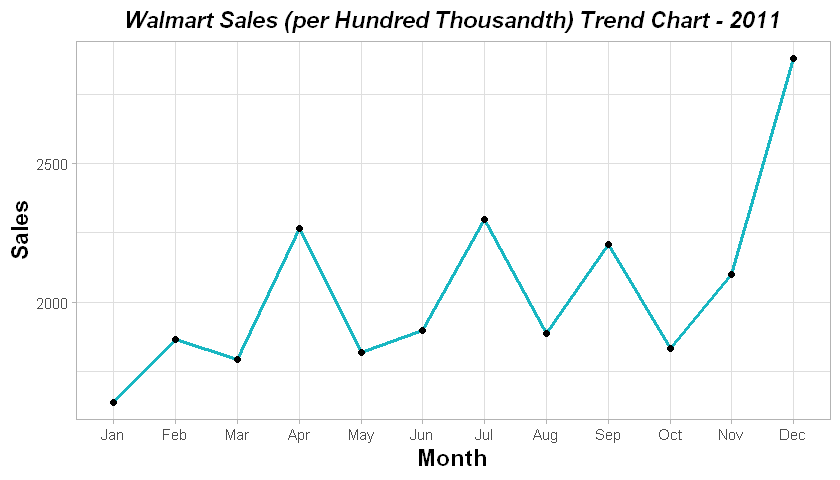

In [104]:
# Month wise sales of Walmart for year 2011

fig(7,4)
ggplot(walmart_sales_2011, aes(x=Month_Name, y=Sales, group = 1)) +
geom_line( color="#00AFBB", size = 1, alpha=0.9, linetype=1) +
geom_point() +
ggtitle("Walmart Sales (per Hundred Thousandth) Trend Chart - 2011") +
xlab("Month") + ylab("Sales") +
theme_light() +
theme(
        plot.title = element_text(color="black", size=14, face="bold.italic", hjust = 0.5),
        axis.title.x = element_text(color="black", size=14, face="bold"),
        axis.title.y = element_text(color="black", size=14, face="bold")) 

- **Looking at the monthly sales of 2011, Feb, Apr, Jul, Sep, Nov, Dec have positive slope of trend line. Dec being the highest.**
- **Jan, Mar, May, Jun, Aug, Oct has downward slope of trend line, Jan being the lowest among all the sales.**


In [105]:
# created variable containing 2011 sales grouped by Month

walmart_sales_2012 <- walmart_data %>% 
                                    select(Weekly_Sales_Scaled, Month_Name, Year) %>%
                                    filter(Year == 2012) %>%
                                    group_by(Month_Name) %>%
                                    summarise(Sales = round(sum(Weekly_Sales_Scaled),2), .groups = 'keep')
walmart_sales_2012

Month_Name,Sales
Jan,1688.94
Feb,1920.64
Mar,2315.10
Apr,1889.21
May,1887.66
Jun,2406.10
Jul,1875.09
Aug,2368.51
Sep,1806.46
Oct,1843.62


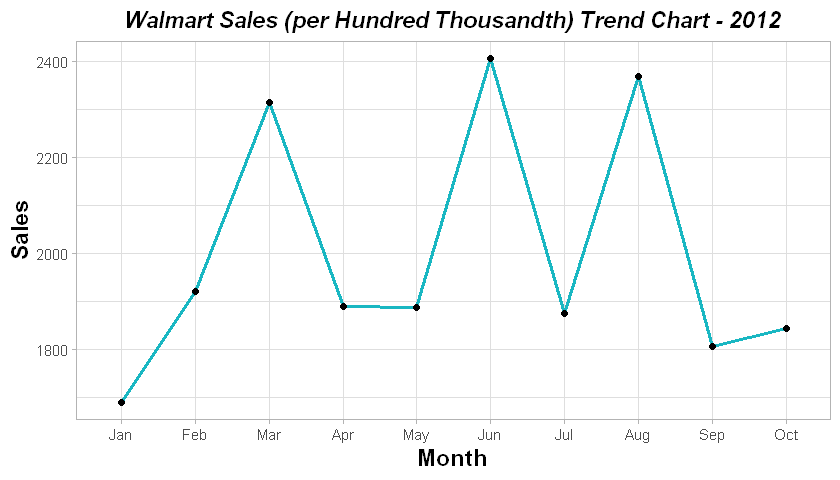

In [106]:
# Month wise sales of Walmart for year 2012

fig(7,4)
ggplot(walmart_sales_2012, aes(x=Month_Name, y=Sales, group = 1)) +
geom_line( color="#00AFBB", size = 1, alpha=0.9, linetype=1) +
geom_point() +
ggtitle("Walmart Sales (per Hundred Thousandth) Trend Chart - 2012") +
xlab("Month") + ylab("Sales") +
theme_light() +
theme(
        plot.title = element_text(color="black", size=14, face="bold.italic", hjust = 0.5),
        axis.title.x = element_text(color="black", size=14, face="bold"),
        axis.title.y = element_text(color="black", size=14, face="bold")) 

- **Performance wise, Mar, Jun, Aug has peak sales.** 
- **Jan, Jul, Sep, Oct months recorded lower sales, where Jan month has lowest of all.**

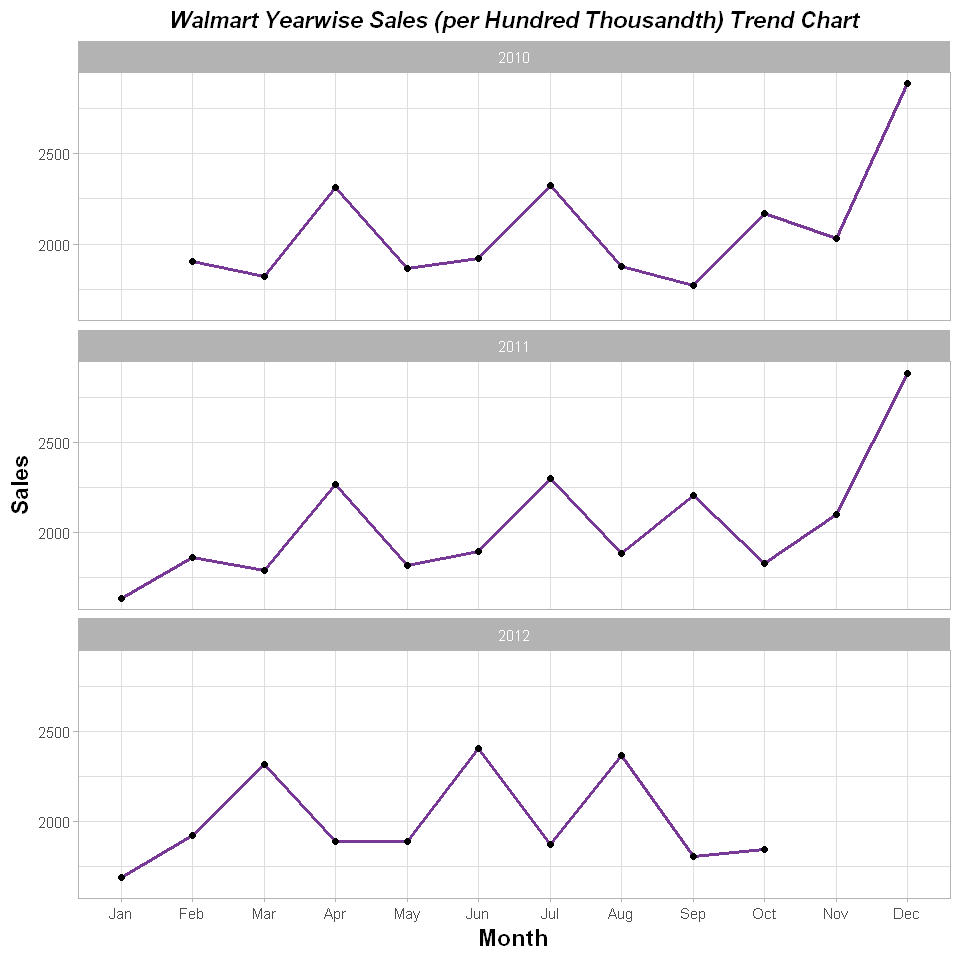

In [107]:
# Trend chart of Monthly Sales, of all the years seperately, in one chart, for visual comparision purpose

fig(8,8)
walmart_data %>% 
                select(Weekly_Sales_Scaled, Month_Name, Year, Quarter) %>%
                group_by(Year, Month_Name) %>%
                summarise(Sales = sum(Weekly_Sales_Scaled), .groups = 'keep') %>%
                        ggplot(aes(x=Month_Name, y=Sales, group = 1)) +
                        geom_line( color="darkorchid4", size = 1, alpha=0.9, linetype=1) +
                        geom_point() +
                        facet_wrap(~ Year, nrow = 3) +
                ggtitle("Walmart Yearwise Sales (per Hundred Thousandth) Trend Chart") +
                xlab("Month") + ylab("Sales") +
                theme_light() +
                theme(
                        plot.title = element_text(color="black", size=14, face="bold.italic", hjust = 0.5),
                        axis.title.x = element_text(color="black", size=14, face="bold"),
                        axis.title.y = element_text(color="black", size=14, face="bold")) 



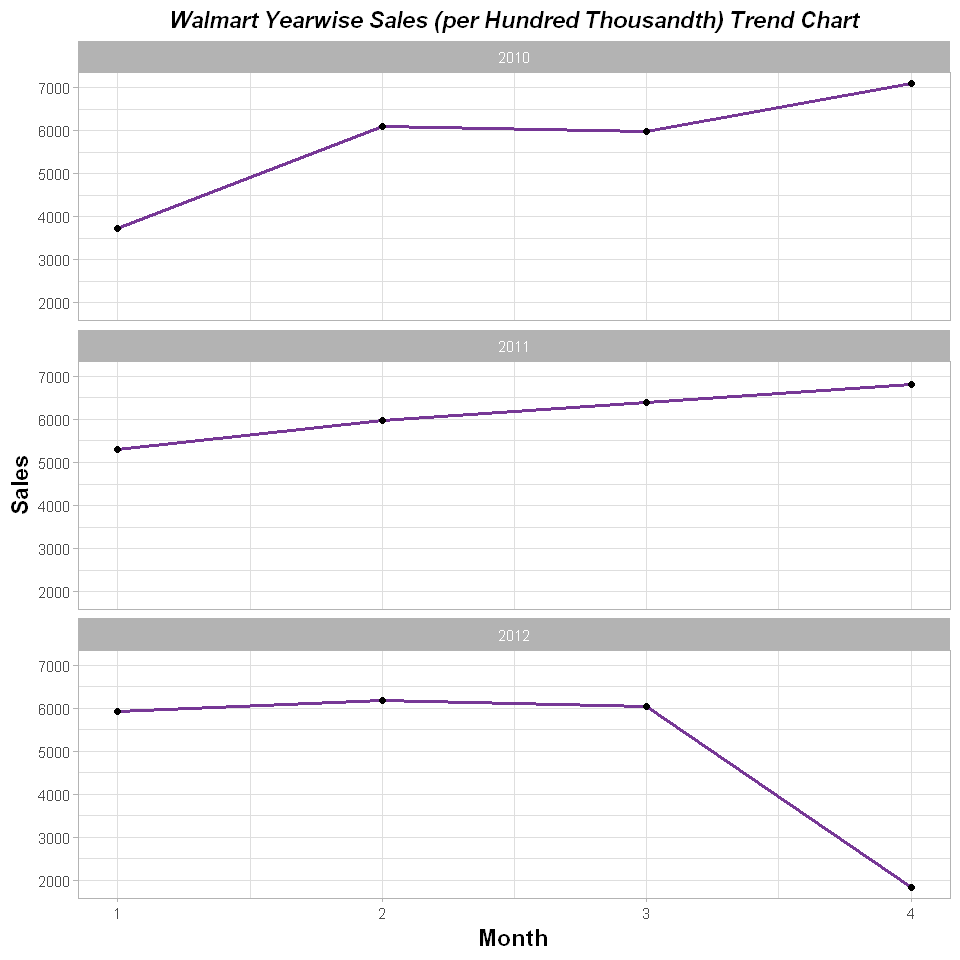

In [108]:
# Trend chart of Quaterly Sales, of all the years seperately, in one chart, for visual comparision purpose

fig(8,8)
walmart_data %>% 
                select(Weekly_Sales_Scaled, Month_Name, Year, Quarter) %>%
                group_by(Year, Quarter) %>%
                summarise(Sales = sum(Weekly_Sales_Scaled), .groups = 'keep') %>%
                        ggplot(aes(x=Quarter, y=Sales, group = 1)) +
                        geom_line( color="darkorchid4", size = 1, alpha=0.9, linetype=1) +
                        geom_point() +
                        facet_wrap(~ Year, nrow = 3) +
                ggtitle("Walmart Yearwise Sales (per Hundred Thousandth) Trend Chart") +
                xlab("Month") + ylab("Sales") +
                theme_light() +
                theme(
                        plot.title = element_text(color="black", size=14, face="bold.italic", hjust = 0.5),
                        axis.title.x = element_text(color="black", size=14, face="bold"),
                        axis.title.y = element_text(color="black", size=14, face="bold")) 



### E. Outlier Detection, Treatment and Model Building - Linear Regression

In [109]:
head(walmart_data)

Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales_Scaled,Super_Bowl,Labour_Day,Thanksgiving,Christmas,Holiday_Names,Day,Month,Year,Quarter,Month_Name
1,2010-02-05,1643690.90,0,42.31,2.572,211.0963582,8.106,16.4369090,0,0,0,0,Others,5,2,2010,1,Feb
1,2010-02-12,1641957.44,1,38.51,2.548,211.2421698,8.106,16.4195744,1,0,0,0,Super_Bowl,12,2,2010,1,Feb
1,2010-02-19,1611968.17,0,39.93,2.514,211.2891429,8.106,16.1196817,0,0,0,0,Others,19,2,2010,1,Feb
1,2010-02-26,1409727.59,0,46.63,2.561,211.3196429,8.106,14.0972759,0,0,0,0,Others,26,2,2010,1,Feb
1,2010-03-05,1554806.68,0,46.50,2.625,211.3501429,8.106,15.5480668,0,0,0,0,Others,5,3,2010,1,Mar
1,2010-03-12,1439541.59,0,57.79,2.667,211.3806429,8.106,14.3954159,0,0,0,0,Others,12,3,2010,1,Mar


In [110]:
str(walmart_data) # checking the structure of the data

'data.frame':	6435 obs. of  19 variables:
 $ Store              : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Date               : Date, format: "2010-02-05" "2010-02-12" ...
 $ Weekly_Sales       : num  1643691 1641957 1611968 1409728 1554807 ...
 $ Holiday_Flag       : int  0 1 0 0 0 0 0 0 0 0 ...
 $ Temperature        : num  42.3 38.5 39.9 46.6 46.5 ...
 $ Fuel_Price         : num  2.57 2.55 2.51 2.56 2.62 ...
 $ CPI                : num  211 211 211 211 211 ...
 $ Unemployment       : num  8.11 8.11 8.11 8.11 8.11 ...
 $ Weekly_Sales_Scaled: num  16.4 16.4 16.1 14.1 15.5 ...
 $ Super_Bowl         : num  0 1 0 0 0 0 0 0 0 0 ...
 $ Labour_Day         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Thanksgiving       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Christmas          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Holiday_Names      : chr  "Others" "Super_Bowl" "Others" "Others" ...
 $ Day                : int  5 12 19 26 5 12 19 26 2 9 ...
 $ Month              : num  2 2 2 2 3 3 3 3 4 4 ...
 $ Year               : num  

In [111]:
colnames(walmart_data) # viewing column names of dataframe walmart_data

[1] "Store"               "Date"                "Weekly_Sales"       
 [4] "Holiday_Flag"        "Temperature"         "Fuel_Price"         
 [7] "CPI"                 "Unemployment"        "Weekly_Sales_Scaled"
[10] "Super_Bowl"          "Labour_Day"          "Thanksgiving"       
[13] "Christmas"           "Holiday_Names"       "Day"                
[16] "Month"               "Year"                "Quarter"            
[19] "Month_Name"

In [112]:
# checking the class of specific column names stored in cols variable using sapply

cols <- c('Super_Bowl', 'Labour_Day', 'Thanksgiving', 'Christmas', 'Month', 'Year')
sapply(walmart_data[cols], class)  

Super_Bowl   Labour_Day Thanksgiving    Christmas        Month         Year 
   "numeric"    "numeric"    "numeric"    "numeric"    "numeric"    "numeric"

In [113]:
# chaning the datatype (class) to integer of column names stored in cols variable using sapply

walmart_data[cols] <- sapply(walmart_data[cols], as.integer)
sapply(walmart_data[cols], class)

Super_Bowl   Labour_Day Thanksgiving    Christmas        Month         Year 
   "integer"    "integer"    "integer"    "integer"    "integer"    "integer"

In [114]:
str(walmart_data) # verifying the structure again, if the change of classes of specific columns is reflecting 

'data.frame':	6435 obs. of  19 variables:
 $ Store              : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Date               : Date, format: "2010-02-05" "2010-02-12" ...
 $ Weekly_Sales       : num  1643691 1641957 1611968 1409728 1554807 ...
 $ Holiday_Flag       : int  0 1 0 0 0 0 0 0 0 0 ...
 $ Temperature        : num  42.3 38.5 39.9 46.6 46.5 ...
 $ Fuel_Price         : num  2.57 2.55 2.51 2.56 2.62 ...
 $ CPI                : num  211 211 211 211 211 ...
 $ Unemployment       : num  8.11 8.11 8.11 8.11 8.11 ...
 $ Weekly_Sales_Scaled: num  16.4 16.4 16.1 14.1 15.5 ...
 $ Super_Bowl         : int  0 1 0 0 0 0 0 0 0 0 ...
 $ Labour_Day         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Thanksgiving       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Christmas          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Holiday_Names      : chr  "Others" "Super_Bowl" "Others" "Others" ...
 $ Day                : int  5 12 19 26 5 12 19 26 2 9 ...
 $ Month              : int  2 2 2 2 3 3 3 3 4 4 ...
 $ Year               : int  

In [115]:
# To check for outliers, filtering the columns of only numeric type, since integers are year, month, holiday columns etc
# Storing it in variable because we can refer the original columns from this variable in case we wish to revert the changes 
# done while doing outliar treatment/imputation.
  
num_cols_df <- walmart_data[, sapply(walmart_data, is.numeric) & !sapply(walmart_data, is.integer)]
head(num_cols_df)

Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales_Scaled
1643690.90,42.31,2.572,211.0963582,8.106,16.4369090
1641957.44,38.51,2.548,211.2421698,8.106,16.4195744
1611968.17,39.93,2.514,211.2891429,8.106,16.1196817
1409727.59,46.63,2.561,211.3196429,8.106,14.0972759
1554806.68,46.50,2.625,211.3501429,8.106,15.5480668
1439541.59,57.79,2.667,211.3806429,8.106,14.3954159


In [116]:
# removing the Weekly_Sales_Scaled because Weekly_Sales column will anyhow be scaled while model building

num_cols_df$Weekly_Sales_Scaled <- NULL

In [117]:
head(num_cols_df)

Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
1643690.90,42.31,2.572,211.0963582,8.106
1641957.44,38.51,2.548,211.2421698,8.106
1611968.17,39.93,2.514,211.2891429,8.106
1409727.59,46.63,2.561,211.3196429,8.106
1554806.68,46.50,2.625,211.3501429,8.106
1439541.59,57.79,2.667,211.3806429,8.106


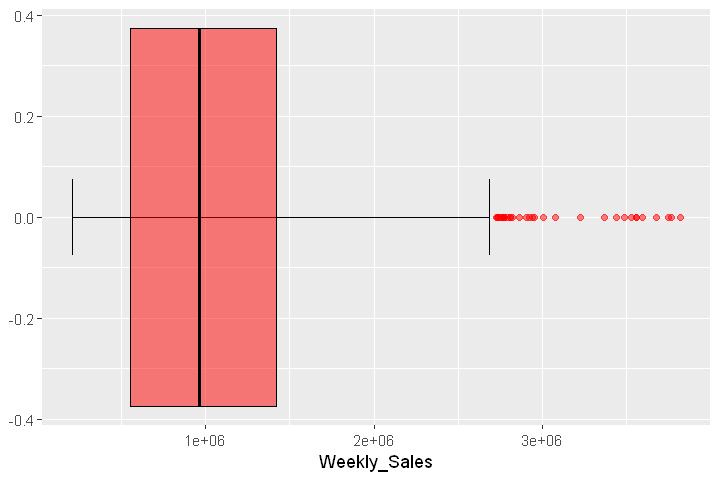

In [118]:
# Visualizing Weekly_sales column using boxplot to check outliers

fig(6,4)

ggplot(walmart_data, aes(x = Weekly_Sales)) + 
stat_boxplot(geom = "errorbar",
            width = 0.15,
            color = 1) +  # Error bar color
geom_boxplot(fill = 2,           # Box color
            alpha = 0.5,        # Transparency
            color = 1,          # Border color
            outlier.colour = 2) # Outlier color

In [119]:
# created qnt variable to calculate quantile - 25th and 75th
# created caps variable to store 5th and 95th percentile, this will be used to cap the outliar values
# H variable is the factor 1.5 times of Inter Quartile Range

# if the variable value is less than 0.25 - 1.5*IQR, we will cap it with 5th percentile of the variable value
# if the variable value is grater than 0.25 + 1.5*IQR, we will cap it with 95th percentile of the variable value

# below is the code implementation of the same


qnt <- quantile(walmart_data$Weekly_Sales, probs=c(.25, .75), na.rm = T)
caps <- quantile(walmart_data$Weekly_Sales, probs=c(.05, .95), na.rm = T)
H <- 1.5 * IQR(walmart_data$Weekly_Sales, na.rm = T)

walmart_data[walmart_data$Weekly_Sales < (qnt[1] - H), 'Weekly_Sales'] <- caps[1]
walmart_data[walmart_data$Weekly_Sales > (qnt[2] + H), 'Weekly_Sales'] <- caps[2]

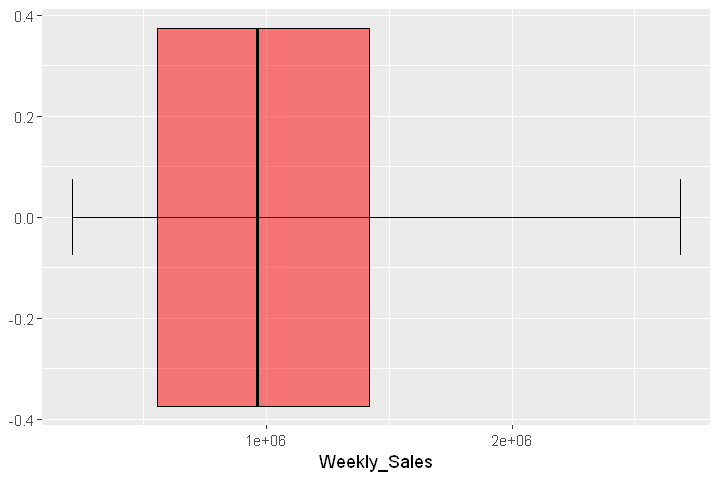

In [120]:
# checking if the column weekly_sales still has outliers

fig(6,4)

ggplot(walmart_data, aes(x = Weekly_Sales)) + 
stat_boxplot(geom = "errorbar",
            width = 0.15,
            color = 1) +  # Error bar color
geom_boxplot(fill = 2,           # Box color
            alpha = 0.5,        # Transparency
            color = 1,          # Border color
            outlier.colour = 2) # Outlier color

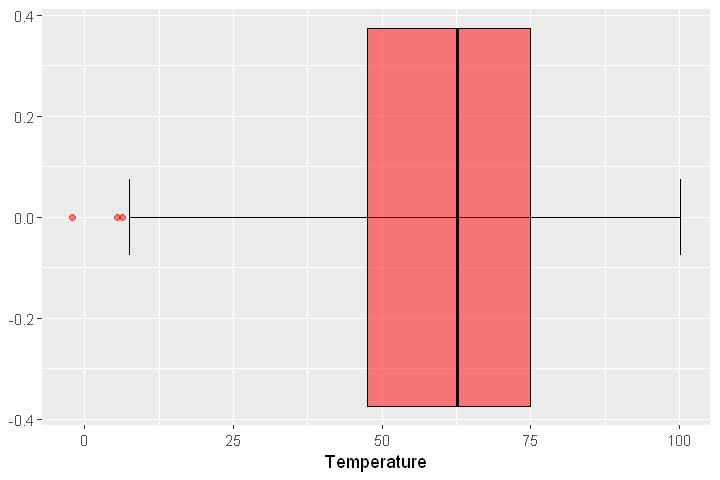

In [121]:
# Checking if the column Temperature has outliers

fig(6,4)

ggplot(walmart_data, aes(x = Temperature)) + 
stat_boxplot(geom = "errorbar",
            width = 0.15,
            color = 1) +  # Error bar color
geom_boxplot(fill = 2,           # Box color
            alpha = 0.5,        # Transparency
            color = 1,          # Border color
            outlier.colour = 2) # Outlier color

In [122]:
# created qnt variable to calculate quantile - 25th and 75th
# created caps variable to store 5th and 95th percentile, this will be used to cap the outliar values
# H variable is the factor 1.5 times of Inter Quartile Range

# if the variable value is less than 0.25 - 1.5*IQR, we will cap it with 5th percentile of the variable value
# if the variable value is grater than 0.25 + 1.5*IQR, we will cap it with 95th percentile of the variable value

# below is the code implementation of the same

qnt <- quantile(walmart_data$Temperature, probs=c(.25, .75), na.rm = T)
caps <- quantile(walmart_data$Temperature, probs=c(.05, .95), na.rm = T)
H <- 1.5 * IQR(walmart_data$Temperature, na.rm = T)

walmart_data[walmart_data$Temperature < (qnt[1] - H), 'Temperature'] <- caps[1]
walmart_data[walmart_data$Temperature > (qnt[2] + H), 'Temperature'] <- caps[2]

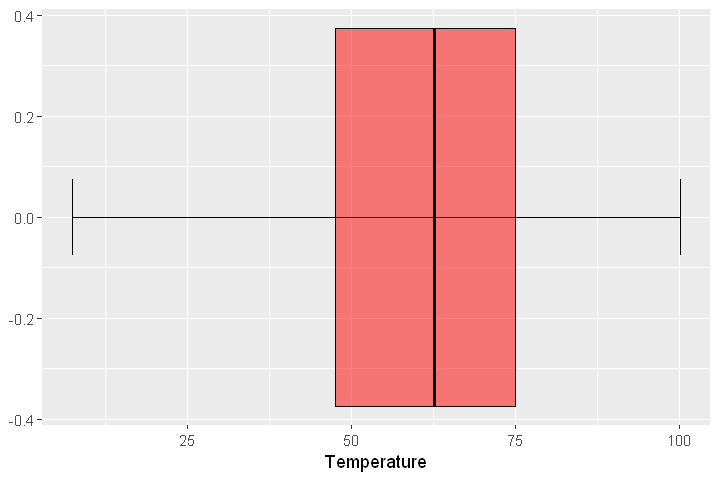

In [123]:
# Checking again if the Temperature column still has outliers

fig(6,4)

ggplot(walmart_data, aes(x = Temperature)) + 
stat_boxplot(geom = "errorbar",
            width = 0.15,
            color = 1) +  # Error bar color
geom_boxplot(fill = 2,           # Box color
            alpha = 0.5,        # Transparency
            color = 1,          # Border color
            outlier.colour = 2) # Outlier color

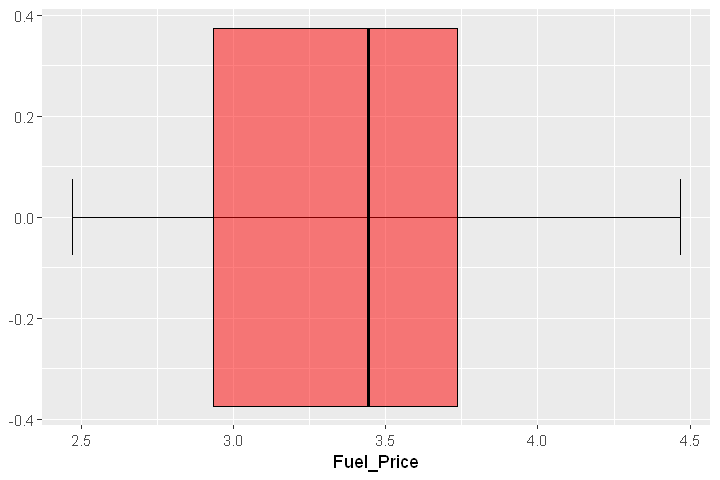

In [124]:
# Created boxplot to see if Fuel Price has any outliers

fig(6,4)

ggplot(num_cols_df, aes(x = Fuel_Price)) + 
stat_boxplot(geom = "errorbar",
            width = 0.15,
            color = 1) +  # Error bar color
geom_boxplot(fill = 2,           # Box color
            alpha = 0.5,        # Transparency
            color = 1,          # Border color
            outlier.colour = 2) # Outlier color

### There are no outliars in Fuel Price column

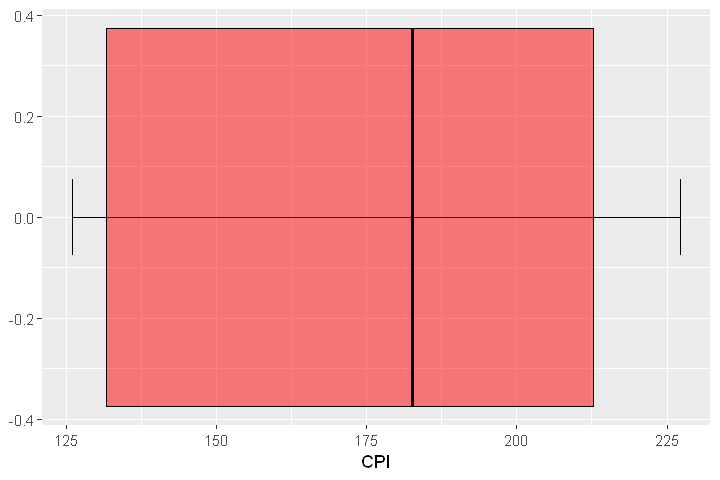

In [125]:
# Visualizing CPI column as boxplot to see if there are any outliers

fig(6,4)

ggplot(num_cols_df, aes(x = CPI)) + 
stat_boxplot(geom = "errorbar",
            width = 0.15,
            color = 1) +  # Error bar color
geom_boxplot(fill = 2,           # Box color
            alpha = 0.5,        # Transparency
            color = 1,          # Border color
            outlier.colour = 2) # Outlier color

### There are no outliars in CPI column

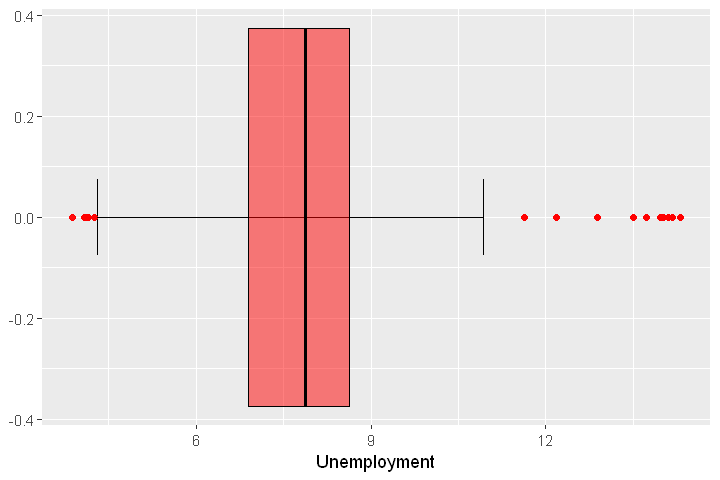

In [126]:
# Visualizing Unemployment column if there are any outliers present

fig(6,4)

ggplot(walmart_data, aes(x = Unemployment)) + 
stat_boxplot(geom = "errorbar",
            width = 0.15,
            color = 1) +  # Error bar color
geom_boxplot(fill = 2,           # Box color
            alpha = 0.5,        # Transparency
            color = 1,          # Border color
            outlier.colour = 2) # Outlier color

In [127]:
# created qnt variable to calculate quantile - 25th and 75th
# created caps variable to store 5th and 95th percentile, this will be used to cap the outliar values
# H variable is the factor 1.5 times of Inter Quartile Range

# if the variable value is less than 0.25 - 1.5*IQR, we will cap it with 5th percentile of the variable value
# if the variable value is grater than 0.25 + 1.5*IQR, we will cap it with 95th percentile of the variable value

# below is the code implementation of the same


qnt <- quantile(walmart_data$Unemployment, probs=c(.25, .75), na.rm = T)
caps <- quantile(walmart_data$Unemployment, probs=c(.05, .95), na.rm = T)
H <- 1.5 * IQR(walmart_data$Unemployment, na.rm = T)

walmart_data[walmart_data$Unemployment < (qnt[1] - H), 'Unemployment'] <- caps[1]
walmart_data[walmart_data$Unemployment > (qnt[2] + H), 'Unemployment'] <- qnt[2] + H

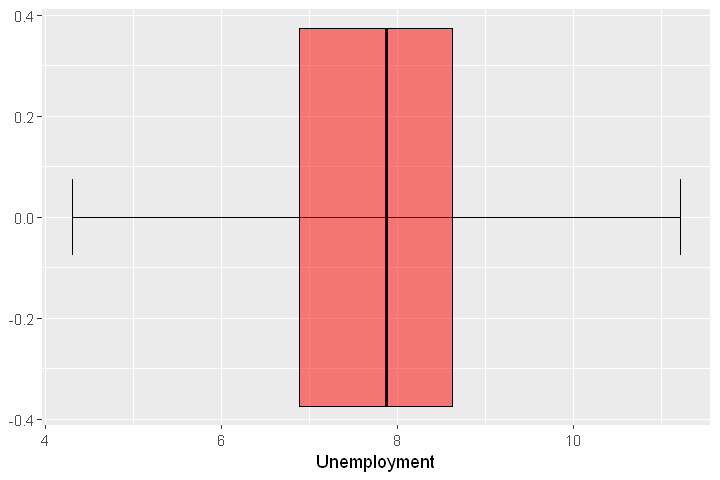

In [128]:
# Checking again if the column unemployment still has outliers

fig(6,4)

ggplot(walmart_data, aes(x = Unemployment)) + 
stat_boxplot(geom = "errorbar",
            width = 0.15,
            color = 1) +  # Error bar color
geom_boxplot(fill = 2,           # Box color
            alpha = 0.5,        # Transparency
            color = 1,          # Border color
            outlier.colour = 2) # Outlier color

### Correlation Plots

In [129]:
# creating new variable 'corr_data' and storing only numeric columns into it 

corr_data = walmart_data[,sapply(walmart_data, is.numeric)]
head(corr_data)

Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales_Scaled,Super_Bowl,Labour_Day,Thanksgiving,Christmas,Day,Month,Year,Quarter
1,1643690.90,0,42.31,2.572,211.0963582,8.106,16.4369090,0,0,0,0,5,2,2010,1
1,1641957.44,1,38.51,2.548,211.2421698,8.106,16.4195744,1,0,0,0,12,2,2010,1
1,1611968.17,0,39.93,2.514,211.2891429,8.106,16.1196817,0,0,0,0,19,2,2010,1
1,1409727.59,0,46.63,2.561,211.3196429,8.106,14.0972759,0,0,0,0,26,2,2010,1
1,1554806.68,0,46.50,2.625,211.3501429,8.106,15.5480668,0,0,0,0,5,3,2010,1
1,1439541.59,0,57.79,2.667,211.3806429,8.106,14.3954159,0,0,0,0,12,3,2010,1


In [130]:
# Removing 'Weekly_Sales_Scaled' column as it is redundent, we already have 'Weekly_Sales' column

corr_data$Weekly_Sales_Scaled <- NULL

In [131]:
head(corr_data)

Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Super_Bowl,Labour_Day,Thanksgiving,Christmas,Day,Month,Year,Quarter
1,1643690.90,0,42.31,2.572,211.0963582,8.106,0,0,0,0,5,2,2010,1
1,1641957.44,1,38.51,2.548,211.2421698,8.106,1,0,0,0,12,2,2010,1
1,1611968.17,0,39.93,2.514,211.2891429,8.106,0,0,0,0,19,2,2010,1
1,1409727.59,0,46.63,2.561,211.3196429,8.106,0,0,0,0,26,2,2010,1
1,1554806.68,0,46.50,2.625,211.3501429,8.106,0,0,0,0,5,3,2010,1
1,1439541.59,0,57.79,2.667,211.3806429,8.106,0,0,0,0,12,3,2010,1


In [132]:
colnames(corr_data)

[1] "Store"        "Weekly_Sales" "Holiday_Flag" "Temperature"  "Fuel_Price"  
 [6] "CPI"          "Unemployment" "Super_Bowl"   "Labour_Day"   "Thanksgiving"
[11] "Christmas"    "Day"          "Month"        "Year"         "Quarter"

In [133]:
# Removing dummy holiday variables which were created, since 'Holiday_Flag' is already present

corr_data <- subset(corr_data, select = -c(Super_Bowl, Labour_Day, Thanksgiving, Christmas))
head(corr_data, n=10)

Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,Quarter
1,1643690.90,0,42.31,2.572,211.0963582,8.106,5,2,2010,1
1,1641957.44,1,38.51,2.548,211.2421698,8.106,12,2,2010,1
1,1611968.17,0,39.93,2.514,211.2891429,8.106,19,2,2010,1
1,1409727.59,0,46.63,2.561,211.3196429,8.106,26,2,2010,1
1,1554806.68,0,46.50,2.625,211.3501429,8.106,5,3,2010,1
1,1439541.59,0,57.79,2.667,211.3806429,8.106,12,3,2010,1
1,1472515.79,0,54.58,2.720,211.2156350,8.106,19,3,2010,1
1,1404429.92,0,51.45,2.732,211.0180424,8.106,26,3,2010,1
1,1594968.28,0,62.27,2.719,210.8204499,7.808,2,4,2010,2
1,1545418.53,0,65.86,2.770,210.6228574,7.808,9,4,2010,2


In [134]:
# creating a correlation matrix, and storing it in a new variable corr_matrix, after rounding it to 2 digits

corr_matrix <- round(cor(corr_data),2)
corr_matrix

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,Quarter
Store,1.00,-0.34,0.00,-0.02,0.06,-0.21,0.27,0.00,0.00,0.00,0.00
Weekly_Sales,-0.34,1.00,0.03,-0.05,0.01,-0.07,-0.11,-0.03,0.06,-0.01,0.05
Holiday_Flag,0.00,0.03,1.00,-0.16,-0.08,0.00,0.01,0.04,0.12,-0.06,0.08
Temperature,-0.02,-0.05,-0.16,1.00,0.14,0.18,0.09,0.03,0.24,0.06,0.24
Fuel_Price,0.06,0.01,-0.08,0.14,1.00,-0.17,-0.04,0.03,-0.04,0.78,-0.04
CPI,-0.21,-0.07,0.00,0.18,-0.17,1.00,-0.29,0.00,0.00,0.07,0.00
Unemployment,0.27,-0.11,0.01,0.09,-0.04,-0.29,1.00,0.00,-0.02,-0.24,-0.02
Day,0.00,-0.03,0.04,0.03,0.03,0.00,0.00,1.00,0.02,0.01,0.02
Month,0.00,0.06,0.12,0.24,-0.04,0.00,-0.02,0.02,1.00,-0.19,0.97
Year,0.00,-0.01,-0.06,0.06,0.78,0.07,-0.24,0.01,-0.19,1.00,-0.19


In [135]:
# this is another way to visualize correlation matrix. All the values will be replaced by symbols 
# based on the correlation magnitude and sign


symnum(corr_matrix, cutpoints = c(-0.99, -0.60, 0.00, 0.60 , 1),
       symbols = c("--", ".", " ", "++"),
       abbr.colnames = TRUE)

             S  W  H  T  F  C  U  D  M  Y  Q 
Store        ++ .  .  .     .     .  .  .  . 
Weekly_Sales .  ++    .     .  .  .     .    
Holiday_Flag .     ++ .  .  .           .    
Temperature  .  .  .  ++                     
Fuel_Price         .     ++ .  .     .  ++ . 
CPI          .  .  .     .  ++ .  .  .     . 
Unemployment    .        .  .  ++ .  .  .  . 
Day          .  .           .  .  ++         
Month        .           .  .  .     ++ .  ++
Year         .  .  .     ++    .     .  ++ . 
Quarter      .           .  .  .     ++ .  ++
attr(,"legend")
[1] -0.99 '--' -0.6 '.' 0 ' ' 0.6 '++' 1

In [136]:
# created new variable 'corr_matrix_2' and stored correlation as matrix, to perform different analysis

corr_matrix_2 <- as.matrix(cor(corr_data, use = 'complete.obs'))
corr_matrix_2 <- round(corr_matrix_2, 2)
corr_matrix_2

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,Quarter
Store,1.00,-0.34,0.00,-0.02,0.06,-0.21,0.27,0.00,0.00,0.00,0.00
Weekly_Sales,-0.34,1.00,0.03,-0.05,0.01,-0.07,-0.11,-0.03,0.06,-0.01,0.05
Holiday_Flag,0.00,0.03,1.00,-0.16,-0.08,0.00,0.01,0.04,0.12,-0.06,0.08
Temperature,-0.02,-0.05,-0.16,1.00,0.14,0.18,0.09,0.03,0.24,0.06,0.24
Fuel_Price,0.06,0.01,-0.08,0.14,1.00,-0.17,-0.04,0.03,-0.04,0.78,-0.04
CPI,-0.21,-0.07,0.00,0.18,-0.17,1.00,-0.29,0.00,0.00,0.07,0.00
Unemployment,0.27,-0.11,0.01,0.09,-0.04,-0.29,1.00,0.00,-0.02,-0.24,-0.02
Day,0.00,-0.03,0.04,0.03,0.03,0.00,0.00,1.00,0.02,0.01,0.02
Month,0.00,0.06,0.12,0.24,-0.04,0.00,-0.02,0.02,1.00,-0.19,0.97
Year,0.00,-0.01,-0.06,0.06,0.78,0.07,-0.24,0.01,-0.19,1.00,-0.19


In [137]:
# replacing the upper triangle of 'corr_matrix_2' with empty string, for better readability
# this matrix is used later to view the positively related columns based on cut off value

corr_matrix_2[upper.tri(corr_matrix_2, diag = TRUE)] <- ""
corr_matrix_2


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,Quarter
Store,,,,,,,,,,,
Weekly_Sales,-0.34,,,,,,,,,,
Holiday_Flag,0,0.03,,,,,,,,,
Temperature,-0.02,-0.05,-0.16,,,,,,,,
Fuel_Price,0.06,0.01,-0.08,0.14,,,,,,,
CPI,-0.21,-0.07,0,0.18,-0.17,,,,,,
Unemployment,0.27,-0.11,0.01,0.09,-0.04,-0.29,,,,,
Day,0,-0.03,0.04,0.03,0.03,0,0,,,,
Month,0,0.06,0.12,0.24,-0.04,0,-0.02,0.02,,,
Year,0,-0.01,-0.06,0.06,0.78,0.07,-0.24,0.01,-0.19,,


In [138]:
# New variable 'neg_corr_matrix' is created with correlations
# replacing the upper triangle of 'neg_corr_matrix' with 1, because we wish to view the negatively related columns 
# with a specific cut off value, and in order to eliminate the redundant outputs, we replace upper triangle with 1
# by doing this, the upper triangle values will not be selected anytime we put conditions based on negative values


neg_corr_matrix <- round(cor(corr_data),2)
neg_corr_matrix[neg_corr_matrix > 0] <- 1
neg_corr_matrix[upper.tri(neg_corr_matrix, diag = TRUE)] <- 1
neg_corr_matrix

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,Quarter
Store,1.00,1.00,1.00,1,1.00,1.00,1.00,1,1.00,1.00,1
Weekly_Sales,-0.34,1.00,1.00,1,1.00,1.00,1.00,1,1.00,1.00,1
Holiday_Flag,0.00,1.00,1.00,1,1.00,1.00,1.00,1,1.00,1.00,1
Temperature,-0.02,-0.05,-0.16,1,1.00,1.00,1.00,1,1.00,1.00,1
Fuel_Price,1.00,1.00,-0.08,1,1.00,1.00,1.00,1,1.00,1.00,1
CPI,-0.21,-0.07,0.00,1,-0.17,1.00,1.00,1,1.00,1.00,1
Unemployment,1.00,-0.11,1.00,1,-0.04,-0.29,1.00,1,1.00,1.00,1
Day,0.00,-0.03,1.00,1,1.00,0.00,0.00,1,1.00,1.00,1
Month,0.00,1.00,1.00,1,-0.04,0.00,-0.02,1,1.00,1.00,1
Year,0.00,-0.01,-0.06,1,1.00,1.00,-0.24,1,-0.19,1.00,1


In [139]:
# 'p_indx', 'n_indx' variable stores the index values of 'corr_matrix_2' (positive corr matrix) and 'neg_corr_matrix'
# based on specific threshold, in our case, index position greater than or equal to 0.5 for positive correlations
# and index positions lesser than -0.3 for negative correlations

# postive_corr_df is a dataframe where we create three columns, Var1, Var2, Cor. Var1 and Var2 contains the names of the columns
# based on the p_indx index values, and Cor column contains their respective correlation value.
# the idea to do this is to only see the column names and correlation value, based on the threshold.

# likewise, dataframe negative_corr_df is created based on n_indx

p_indx <- which(corr_matrix_2 >= 0.5, arr.ind = TRUE)
n_indx <- which(neg_corr_matrix < -0.30, arr.ind = TRUE)

postive_corr_df <- data.frame(Var1 = rownames(corr_matrix_2)[p_indx[, 1]], 
           Var2 = colnames(corr_matrix_2)[p_indx[, 2]], 
            Cor = corr_matrix_2[p_indx])

negative_corr_df <- data.frame(Var1 = rownames(neg_corr_matrix)[n_indx[, 1]], 
           Var2 = colnames(neg_corr_matrix)[n_indx[, 2]], 
            Cor = neg_corr_matrix[n_indx])

In [140]:
postive_corr_df

Var1,Var2,Cor
Year,Fuel_Price,0.78
Quarter,Month,0.97


In [141]:
negative_corr_df

Var1,Var2,Cor
Weekly_Sales,Store,-0.34


### Q. Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

### Ans: Based on corrleation matrix values, since CPI, unemployment, and fuel price have no significant correlation coefficient magnitude with Weekly_sales, therefore, there is not relationship of CPI, Uemployment and Fuel Price on Weekly sales

In [142]:
head(walmart_data, n = 10)

Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales_Scaled,Super_Bowl,Labour_Day,Thanksgiving,Christmas,Holiday_Names,Day,Month,Year,Quarter,Month_Name
1,2010-02-05,1643690.90,0,42.31,2.572,211.0963582,8.106,16.4369090,0,0,0,0,Others,5,2,2010,1,Feb
1,2010-02-12,1641957.44,1,38.51,2.548,211.2421698,8.106,16.4195744,1,0,0,0,Super_Bowl,12,2,2010,1,Feb
1,2010-02-19,1611968.17,0,39.93,2.514,211.2891429,8.106,16.1196817,0,0,0,0,Others,19,2,2010,1,Feb
1,2010-02-26,1409727.59,0,46.63,2.561,211.3196429,8.106,14.0972759,0,0,0,0,Others,26,2,2010,1,Feb
1,2010-03-05,1554806.68,0,46.50,2.625,211.3501429,8.106,15.5480668,0,0,0,0,Others,5,3,2010,1,Mar
1,2010-03-12,1439541.59,0,57.79,2.667,211.3806429,8.106,14.3954159,0,0,0,0,Others,12,3,2010,1,Mar
1,2010-03-19,1472515.79,0,54.58,2.720,211.2156350,8.106,14.7251579,0,0,0,0,Others,19,3,2010,1,Mar
1,2010-03-26,1404429.92,0,51.45,2.732,211.0180424,8.106,14.0442992,0,0,0,0,Others,26,3,2010,1,Mar
1,2010-04-02,1594968.28,0,62.27,2.719,210.8204499,7.808,15.9496828,0,0,0,0,Others,2,4,2010,2,Apr
1,2010-04-09,1545418.53,0,65.86,2.770,210.6228574,7.808,15.4541853,0,0,0,0,Others,9,4,2010,2,Apr


### Creating Linear Model

In [143]:
# Storing the specific columns in model_data variable

model_data <- subset(walmart_data, select = -c(Date, Holiday_Names, Holiday_Flag, Weekly_Sales_Scaled, 
                                               Quarter, Month_Name, Fuel_Price ))

head(model_data, n=10)

Store,Weekly_Sales,Temperature,CPI,Unemployment,Super_Bowl,Labour_Day,Thanksgiving,Christmas,Day,Month,Year
1,1643690.90,42.31,211.0963582,8.106,0,0,0,0,5,2,2010
1,1641957.44,38.51,211.2421698,8.106,1,0,0,0,12,2,2010
1,1611968.17,39.93,211.2891429,8.106,0,0,0,0,19,2,2010
1,1409727.59,46.63,211.3196429,8.106,0,0,0,0,26,2,2010
1,1554806.68,46.50,211.3501429,8.106,0,0,0,0,5,3,2010
1,1439541.59,57.79,211.3806429,8.106,0,0,0,0,12,3,2010
1,1472515.79,54.58,211.2156350,8.106,0,0,0,0,19,3,2010
1,1404429.92,51.45,211.0180424,8.106,0,0,0,0,26,3,2010
1,1594968.28,62.27,210.8204499,7.808,0,0,0,0,2,4,2010
1,1545418.53,65.86,210.6228574,7.808,0,0,0,0,9,4,2010


In [144]:
# scaling the columns, except the ones which have 0 and 1 as values

cols_to_scale <- c('Store','Weekly_Sales', 'Temperature', 'CPI', 'Unemployment', 'Year', 'Month', 'Day')
model_data[,cols_to_scale] <- scale(model_data[, cols_to_scale])
head(model_data, n=10)

Store,Weekly_Sales,Temperature,CPI,Unemployment,Super_Bowl,Labour_Day,Thanksgiving,Christmas,Day,Month,Year
-1.69384748029762,1.097534375557905,-0.9972007109095585,1.004097193239728,0.1467938199052847,0,0,0,0,-1.219574020925407,-1.373418444284726,-1.21080498156193
-1.69384748029762,1.094375115071336,-1.2035345621576705,1.007802065712423,0.1467938199052847,1,0,0,0,-0.420102118537501,-1.373418444284726,-1.21080498156193
-1.69384748029762,1.039719157776656,-1.1264308598491655,1.008995587662304,0.1467938199052847,0,0,0,0,0.379369783850405,-1.373418444284726,-1.21080498156193
-1.69384748029762,0.671132243065785,-0.7626317010695999,1.009770550768238,0.1467938199052847,0,0,0,0,1.178841686238311,-1.373418444284726,-1.21080498156193
-1.69384748029762,0.935541364974755,-0.7696904907175617,1.010545513874172,0.1467938199052847,0,0,0,0,-1.219574020925407,-1.064615240616934,-1.21080498156193
-1.69384748029762,0.725468767788914,-0.1566617589830402,1.011320476980106,0.1467938199052847,0,0,0,0,-0.420102118537501,-1.064615240616934,-1.21080498156193
-1.69384748029762,0.785564811041258,-0.3309595649057873,1.007127852891986,0.1467938199052847,0,0,0,0,0.379369783850405,-1.064615240616934,-1.21080498156193
-1.69384748029762,0.661477148917734,-0.5009135002759423,1.002107296334426,0.1467938199052847,0,0,0,0,1.178841686238311,-1.064615240616934,-1.21080498156193
-1.69384748029762,1.008736567608431,0.0865949919621023,0.997086742317729,-0.0536107199518823,0,0,0,0,-1.562204836234510,-0.755812036949141,-1.21080498156193
-1.69384748029762,0.918431301092705,0.2815261830096604,0.992066188301031,-0.0536107199518823,0,0,0,0,-0.762732933846604,-0.755812036949141,-1.21080498156193


In [145]:
# splitting the data into training and test set in 70% and 30% ratio & storing it in variable trainingSet, testSet respectively

sample = sample.split(model_data, SplitRatio = 0.7) # Returns a vector with T for 70% of data and F for 30% data
trainingSet = subset(model_data, sample == T)
testSet = subset(model_data, sample == F)


In [146]:
head(trainingSet)

,Store,Weekly_Sales,Temperature,CPI,Unemployment,Super_Bowl,Labour_Day,Thanksgiving,Christmas,Day,Month,Year
1,-1.69384748029762,1.097534375557905,-0.9972007109095585,1.004097193239728,0.1467938199052847,0,0,0,0,-1.219574020925407,-1.373418444284726,-1.21080498156193
2,-1.69384748029762,1.094375115071336,-1.2035345621576705,1.007802065712423,0.1467938199052847,1,0,0,0,-0.420102118537501,-1.373418444284726,-1.21080498156193
4,-1.69384748029762,0.671132243065785,-0.7626317010695999,1.009770550768238,0.1467938199052847,0,0,0,0,1.178841686238311,-1.373418444284726,-1.21080498156193
5,-1.69384748029762,0.935541364974755,-0.7696904907175617,1.010545513874172,0.1467938199052847,0,0,0,0,-1.219574020925407,-1.064615240616934,-1.21080498156193
7,-1.69384748029762,0.785564811041258,-0.3309595649057873,1.007127852891986,0.1467938199052847,0,0,0,0,0.379369783850405,-1.064615240616934,-1.21080498156193
9,-1.69384748029762,1.008736567608431,0.0865949919621023,0.997086742317729,-0.0536107199518823,0,0,0,0,-1.562204836234510,-0.755812036949141,-1.21080498156193


In [147]:
head(testSet)

,Store,Weekly_Sales,Temperature,CPI,Unemployment,Super_Bowl,Labour_Day,Thanksgiving,Christmas,Day,Month,Year
3,-1.69384748029762,1.039719157776656,-1.126430859849165,1.008995587662304,0.1467938199052847,0,0,0,0,0.379369783850405,-1.373418444284726,-1.21080498156193
6,-1.69384748029762,0.725468767788914,-0.156661758983040,1.011320476980106,0.1467938199052847,0,0,0,0,-0.420102118537501,-1.064615240616934,-1.21080498156193
8,-1.69384748029762,0.661477148917734,-0.500913500275942,1.002107296334426,0.1467938199052847,0,0,0,0,1.178841686238311,-1.064615240616934,-1.21080498156193
12,-1.69384748029762,0.637467673188293,0.226141833464115,0.987397744488456,-0.0536107199518823,0,0,0,0,0.836210870929209,-0.755812036949141,-1.21080498156193
15,-1.69384748029762,0.825178514126713,0.765867749623649,0.984813771029595,-0.0536107199518823,0,0,0,0,-0.191681574998099,-0.447008833281349,-1.21080498156193
18,-1.69384748029762,1.046201012732006,1.086771186696370,1.006131651794052,-0.0536107199518823,0,0,0,0,-1.333784292695108,-0.138205629613557,-1.21080498156193


In [148]:
# Creating the model and viewing the model parameters created using summary

linear_model <- lm(Weekly_Sales ~ . , data = trainingSet)
summary(linear_model)


Call:
lm(formula = Weekly_Sales ~ ., data = trainingSet)

Residuals:
            Min              1Q          Median              3Q             Max 
-2.058563466608 -0.701432918096 -0.054524007852  0.681769599988  3.268710282481 

Coefficients:
                      Estimate        Std. Error   t value   Pr(>|t|)    
(Intercept)  -0.00855970607293  0.01465194649973  -0.58420  0.5591148    
Store        -0.35568973217283  0.01482071549249 -23.99950 < 2.22e-16 ***
Temperature  -0.04129573030712  0.01589104938801  -2.59868  0.0093905 ** 
CPI          -0.15468707984677  0.01530486207683 -10.10705 < 2.22e-16 ***
Unemployment -0.05218391490816  0.01596316083259  -3.26902  0.0010877 ** 
Super_Bowl    0.12672835668561  0.10208385488158   1.24141  0.2145208    
Labour_Day    0.01427937332357  0.10077574243349   0.14169  0.8873280    
Thanksgiving  0.66718462442039  0.12469983738143   5.35032 9.2387e-08 ***
Christmas    -0.21483101611608  0.12934912258082  -1.66086  0.0968145 .  
Day          

### Adjusted R square is lower than Multiple R square, because there are variables which are not significant, the ones which have high p-values and do not have asterisk in front of them

### Re Building the model removing non-significant variables


In [149]:
# removing non significant variables

model_data <- subset(walmart_data, select = -c(Date, Holiday_Names, Holiday_Flag, Weekly_Sales_Scaled, 
                                               Quarter, Fuel_Price, Month_Name, Super_Bowl,Labour_Day, Christmas, Day, Year))

head(model_data, n=10)

Store,Weekly_Sales,Temperature,CPI,Unemployment,Thanksgiving,Month
1,1643690.90,42.31,211.0963582,8.106,0,2
1,1641957.44,38.51,211.2421698,8.106,0,2
1,1611968.17,39.93,211.2891429,8.106,0,2
1,1409727.59,46.63,211.3196429,8.106,0,2
1,1554806.68,46.50,211.3501429,8.106,0,3
1,1439541.59,57.79,211.3806429,8.106,0,3
1,1472515.79,54.58,211.2156350,8.106,0,3
1,1404429.92,51.45,211.0180424,8.106,0,3
1,1594968.28,62.27,210.8204499,7.808,0,4
1,1545418.53,65.86,210.6228574,7.808,0,4


In [150]:
# scaling the variables/columns so that all the column values are within same range

cols_to_scale <- c('Store','Weekly_Sales', 'Temperature', 'CPI', 'Unemployment', 'Month')
model_data[,cols_to_scale] <- scale(model_data[, cols_to_scale])
head(model_data, n=10)

Store,Weekly_Sales,Temperature,CPI,Unemployment,Thanksgiving,Month
-1.69384748029762,1.097534375557905,-0.9972007109095585,1.004097193239728,0.1467938199052847,0,-1.373418444284726
-1.69384748029762,1.094375115071336,-1.2035345621576705,1.007802065712423,0.1467938199052847,0,-1.373418444284726
-1.69384748029762,1.039719157776656,-1.1264308598491655,1.008995587662304,0.1467938199052847,0,-1.373418444284726
-1.69384748029762,0.671132243065785,-0.7626317010695999,1.009770550768238,0.1467938199052847,0,-1.373418444284726
-1.69384748029762,0.935541364974755,-0.7696904907175617,1.010545513874172,0.1467938199052847,0,-1.064615240616934
-1.69384748029762,0.725468767788914,-0.1566617589830402,1.011320476980106,0.1467938199052847,0,-1.064615240616934
-1.69384748029762,0.785564811041258,-0.3309595649057873,1.007127852891986,0.1467938199052847,0,-1.064615240616934
-1.69384748029762,0.661477148917734,-0.5009135002759423,1.002107296334426,0.1467938199052847,0,-1.064615240616934
-1.69384748029762,1.008736567608431,0.0865949919621023,0.997086742317729,-0.0536107199518823,0,-0.755812036949141
-1.69384748029762,0.918431301092705,0.2815261830096604,0.992066188301031,-0.0536107199518823,0,-0.755812036949141


In [151]:
# Splitting the dataset into training and testing set with 70% and 30% ratio and storing them into variables

sample = sample.split(model_data, SplitRatio = 0.7) # Returns a vector with T for 70% of data and F for 30% data
trainingSet = subset(model_data, sample == T)
testSet = subset(model_data, sample == F)


In [152]:
# Creating the model again

linear_model <- lm(Weekly_Sales ~ . , data = trainingSet)
summary(linear_model)


Call:
lm(formula = Weekly_Sales ~ ., data = trainingSet)

Residuals:
             Min               1Q           Median               3Q 
-1.8593459563999 -0.7033787213362 -0.0611230995104  0.6824981528095 
             Max 
 3.1496180870781 

Coefficients:
                      Estimate        Std. Error   t value   Pr(>|t|)    
(Intercept)  -0.00832912792241  0.01529840013251  -0.54444  0.5861688    
Store        -0.35658882915177  0.01591226538877 -22.40968 < 2.22e-16 ***
Temperature  -0.03966348985775  0.01625051458981  -2.44075  0.0147037 *  
CPI          -0.15570365329744  0.01644373448852  -9.46887 < 2.22e-16 ***
Unemployment -0.05080700542226  0.01648367815926  -3.08226  0.0020696 ** 
Thanksgiving  0.26677343030365  0.13027473797393   2.04778  0.0406530 *  
Month         0.06814929556980  0.01597085952582   4.26710 2.0303e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.920626496362 on 3670 degrees of freedom
Multiple R-squ

- **The model created has all the variables p-value lesser than 0.05, which means that independent variables are significant to the model**
- **Multiple R squared and Adjusted are square are similar, confirming the no irrelavant variables are present in the model**
- **However, the magnitude of R squared is very poor, only 14.5% of variance is explained by the independent variable of dependent variable**
- **This model is not a good fit for this particular data.**

In [153]:
# below is the code to predict the dependent variable using the model created

pred <- predict(linear_model, newdata = testSet)

In [154]:
# Using functions of 'modelr' library, we can get R squared, Root Mean Square Error, and Mean Absolute Error as follows


data.frame(
  R2 = rsquare(linear_model, data = testSet),
  RMSE = rmse(linear_model, data = testSet),
  MAE = mae(linear_model, data = testSet)
)

R2,RMSE,MAE
0.147348100084151,0.929378942990169,0.776662060922886


In [155]:
# Likewise, using the functions of 'caret' library, we can get the performance metrics of Linear Regression as follows:

data.frame(
  R2 = R2(pred, testSet$Weekly_Sales),
  RMSE = RMSE(pred, testSet$Weekly_Sales),
  MAE = MAE(pred, testSet$Weekly_Sales)
)

R2,RMSE,MAE
0.147382857911645,0.929378942990169,0.776662060922886
